___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from customer of a food delivery company.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will specify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

***Features:***
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- ***Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise*** 
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- The First Look

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering with numeric features

    * Create a new dataset with numeric features
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Clustering based on selected features

    * Create a new dataset with variables of your choice*
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering with selected features

    * Determine optimal number of clusters using Dendogram*

    * Apply Agglomerative Clustering*

    * Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

### Import Libraries

In [227]:
import numpy as np
from numpy.random import uniform
from random import sample
from sklearn.neighbors import NearestNeighbors
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = (
    lambda x: "{:.0f}".format(x) if int(x) == x else "{:,.2f}".format(x)
)

### Load Dataset

In [228]:
data = pd.read_csv('marketing_campaign.csv', sep=';')

In [229]:
df = data.copy()
df.sample(10).T

338         182         152         153   \
ID                         9560       10562        7798          92   
Year_Birth                 1965        1946        1972        1988   
Education            Graduation      Master    2n Cycle  Graduation   
Marital_Status         Together     Married    Together       Alone   
Income                    83003       66835       46344       34176   
Kidhome                       0           0           0           1   
Teenhome                      0           0           1           0   
Dt_Customer          2013-03-03  2013-09-28  2012-12-14  2014-05-12   
Recency                      18          21          28          12   
MntWines                    856         620         233           5   
MntFruits                    61          26          20           7   
MntMeatProducts             570         195          57          24   
MntFishProducts              40          34           8          19   
MntSweetProducts             25          17          20          14   
MntGoldProds                122         141          91          20   
NumDealsPurchases             1           1           4           4   
NumWebPurchases               7           6           7           3   
NumCatalogPurchases           6           4           1           0   
NumStorePurchases             8          13           5           4   
NumWebVisitsMonth             3           2           7           6   
AcceptedCmp3                  0           0           0           0   
AcceptedCmp4                  0           0           0           0   
AcceptedCmp5                  1           0           0           0   
AcceptedCmp1                  0           0           0           0   
AcceptedCmp2                  0           0           0           0   
Complain                      0           0           0           0   
Z_CostContact                 3           3           3           3   
Z_Revenue                    11          11          11          11   
Response                      1           0           0           0   

                           499         1038        1308        1684  \
ID                          466        6019        5758       10323   
Year_Birth                 1944        1971        1982        1952   
Education            Graduation         PhD  Graduation  Graduation   
Marital_Status          Married     Married     Married     Married   
Income                    65275       37126       65169       49413   
Kidhome                       0           1           0           0   
Teenhome                      0           0           0           1   
Dt_Customer          2013-04-03  2014-03-30  2014-01-14  2013-10-25   
Recency                       9           9          23          88   
MntWines                    388          45        1074         205   
MntFruits                    14           3           0           7   
MntMeatProducts             218           9          69          41   
MntFishProducts              91           4           0           3   
MntSweetProducts             14           4           0           2   
MntGoldProds                 21           7          46          46   
NumDealsPurchases             1           1           1           2   
NumWebPurchases               4           1          10           4   
NumCatalogPurchases           3           2           4           2   
NumStorePurchases            13           2          13           5   
NumWebVisitsMonth             2           6           6           5   
AcceptedCmp3                  0           1           1           0   
AcceptedCmp4                  0           0           0           0   
AcceptedCmp5                  0           0           1           0   
AcceptedCmp1                  0           0           1           0   
AcceptedCmp2                  0           0           1           0   
Complain                      0           0       

### The First Look
- Since we will do clustering analysis, we will remove Response variable from dataset.
- You can rename columns to more usable, if you need.

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [231]:
from skimpy import skim

skim(df)

from skimpy import clean_columns

df = clean_columns(df)
df.head(3)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2240   │ │ int32       │ 25    │                                                          │
│ │ Number of columns │ 29     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean      ┃ sd      ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID                    │   0 │     0 │      5592 │    3247 │    0 │  2828 │  5458 │  8428 │  11190 │ ▇▇▇▇▆▇ │  │
│ │ Year_Birth            │   0 │     0 │      1969 │   11.98 │ 1893 │  1959 │  1970 │  1977 │   1996 │    ▅▇▃ │  │
│ │ Income                │  24 │  1.07 │     52250 │   25170 │ 1730 │ 35300 │ 51380 │ 68520 │ 666700 │   ▇    │  │
│ │ Kidhome               │   0 │     0 │    0.4442 │  0.5384 │    0 │     0 │     0 │     1 │      2 │  ▇  ▆  │  │
│ │ Teenhome              │   0 │     0 │    0.5062 │  0.5445 │    0 │     0 │     0 │     1 │      2 │  ▇  ▇  │  │
│ │ Recency               │   0 │     0 │     49.11 │   28.96 │    0 │    24 │    49 │    74 │     99 │ ▇▇▇▇▇▇ │  │
│ │ MntWines              │   0 │     0 │     303.9 │   336.6 │    0 │ 23.75 │ 173.5 │ 504.2 │   1493 │ ▇▂▂▁▁  │  │
│ │ MntFruits             │   0 │     0 │      26.3 │   39.77 │    0 │     1 │     8 │    33 │    199 │  ▇▁▁   │  │
│ │ MntMeatProducts       │   0 │     0 │     166.9 │   225.7 │    0 │    16 │    67 │   232 │   1725 │  ▇▁▁   │  │
│ │ MntFishProducts       │   0 │     0 │     37.53 │   54.63 │    0 │     3 │    12 │    50 │    259 │  ▇▁▁   │  │
│ │ MntSweetProducts      │   0 │     0 │     27.06 │   41.28 │    0 │     1 │     8 │    33 │    263 │  ▇▁▁   │  │
│ │ MntGoldProds          │   0 │     0 │     44.02 │   52.17 │    0 │     9 │    24 │    56 │    362 │  ▇▁▁   │  │
│ │ NumDealsPurchases     │   0 │     0 │     2.325 │   1.932 │    0 │     1 │     2 │     3 │     15 │  ▇▃▁   │  │
│ │ NumWebPurchases       │   0 │     0 │     4.085 │   2.779 │    0 │     2 │     4 │     6 │     27 │  ▇▃▁   │  │
│ │ NumCatalogPurchases   │   0 │     0 │     2.662 │   2.923 │    0 │     0 │     2 │     4 │     28 │   ▇▂   │  │
│ │ NumStorePurchases     │   0 │     0 │      5.79 │   3.251 │    0 │     3 │     5 │     8 │     13 │ ▂▇▃▃▂▃ │  │
│ │ NumWebVisitsMonth     │   0 │     0 │     5.317 │   2.427 │    0 │     3 │     6 │     7 │     20 │  ▅▇▇   │  │
│ │ AcceptedCmp3          │   0 │     0 │   0.07277 │  0.2598 │    0 │     0 │     0 │     0 │      1 │ ▇    ▁ │  │
│ │ AcceptedCmp4          │   0 │     0 │   0.07455 │  0.2627 │    0 │     0 │     0 │     0 │      1 │ ▇    ▁ │  │
│ │ AcceptedCmp5          │   0 │     0 │   0.07277 │  0.2598 │    0 │     0 │     0 │     0 │      1 │ ▇    ▁ │  │
│ │ AcceptedCmp1          │   0 │     0 │   0.06429 │  0.2453 │    0 │     0 │     0 │     0 │      1 │ ▇    ▁ │  │
│ │ AcceptedCmp2          │   0 │     0 │   0.01339 │   

id  year_birth   education marital_status  income  kidhome  teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   

  dt_customer  recency  mnt_wines  ...  num_web_visits_month  accepted_cmp_3  \
0  2012-09-04       58        635  ...                     7               0   
1  2014-03-08       38         11  ...                     5               0   
2  2013-08-21       26        426  ...                     4               0   

   accepted_cmp_4  accepted_cmp_5  accepted_cmp_1  accepted_cmp_2  complain  \
0               0               0               0               0         0   
1               0               0               0               0         0   
2               0               0               0               0         0   

   z_cost_contact  z_revenue  response  
0               3         11         1  
1               3         11         0  
2               3         11         0  

[3 rows x 29 columns]

In [232]:
df.duplicated().sum()

0

In [233]:
df.isnull().sum()

id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp_3            0
accepted_cmp_4            0
accepted_cmp_5            0
accepted_cmp_1            0
accepted_cmp_2            0
complain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

In [234]:
df.describe().T

count      mean       std  min      25%       50%  \
id                      2240  5,592.16  3,246.66    0 2,828.25  5,458.50   
year_birth              2240  1,968.81     11.98 1893     1959      1970   
income                  2216 52,247.25 25,173.08 1730    35303 51,381.50   
kidhome                 2240      0.44      0.54    0        0         0   
teenhome                2240      0.51      0.54    0        0         0   
recency                 2240     49.11     28.96    0       24        49   
mnt_wines               2240    303.94    336.60    0    23.75    173.50   
mnt_fruits              2240     26.30     39.77    0        1         8   
mnt_meat_products       2240    166.95    225.72    0       16        67   
mnt_fish_products       2240     37.53     54.63    0        3        12   
mnt_sweet_products      2240     27.06     41.28    0        1         8   
mnt_gold_prods          2240     44.02     52.17    0        9        24   
num_deals_purchases     2240      2.33      1.93    0        1         2   
num_web_purchases       2240      4.08      2.78    0        2         4   
num_catalog_purchases   2240      2.66      2.92    0        0         2   
num_store_purchases     2240      5.79      3.25    0        3         5   
num_web_visits_month    2240      5.32      2.43    0        3         6   
accepted_cmp_3          2240      0.07      0.26    0        0         0   
accepted_cmp_4          2240      0.07      0.26    0        0         0   
accepted_cmp_5          2240      0.07      0.26    0        0         0   
accepted_cmp_1          2240      0.06      0.25    0        0         0   
accepted_cmp_2          2240      0.01      0.11    0        0         0   
complain                2240      0.01      0.10    0        0         0   
z_cost_contact          2240         3         0    3        3         3   
z_revenue               2240        11         0   11       11        11   
response                2240      0.15      0.36    0        0         0   

                           75%    max  
id                    8,427.75  11191  
year_birth                1977   1996  
income                   68522 666666  
kidhome                      1      2  
teenhome                     1      2  
recency                     74     99  
mnt_wines               504.25   1493  
mnt_fruits                  33    199  
mnt_meat_products          232   1725  
mnt_fish_products           50    259  
mnt_sweet_products          33    263  
mnt_gold_prods              56    362  
num_deals_purchases          3     15  
num_web_purchases            6     27  
num_catalog_purchases        4     28  
num_store_purchases          8     13  
num_web_visits_month         7     20  
accepted_cmp_3               0      1  
accepted_cmp_4               0      1  
accepted_cmp_5               0      1  
accepted_cmp_1               0      1  
accepted_cmp_2               0      1  
complain                     0      1  
z_cost_contact               3      3  
z_revenue                   11     11  
response                     0      1

In [235]:
df.describe(include='object').T

count unique         top  freq
education       2240      5  Graduation  1127
marital_status  2240      8     Married   864
dt_customer     2240    663  2012-08-31    12

In [236]:
# Tarih sütununu datetime formatına dönüştürme
df['dt_customer'] = pd.to_datetime(df['dt_customer'])

# En son tarihi alma
max_date = df['dt_customer'].max()

# Müşterilik süresini hesaplama (günlük)
df['dt_days'] = (max_date - df['dt_customer']).dt.days
df['dt_days']

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: dt_days, Length: 2240, dtype: int64

In [237]:
df['age'] = 2014 - df['year_birth']
df.age.value_counts()

age
38     89
43     87
39     83
42     79
36     77
44     77
41     74
49     74
45     71
40     69
58     55
56     53
35     53
62     52
37     52
46     51
55     51
48     50
60     50
59     49
54     49
32     45
51     45
47     44
52     44
57     43
63     43
31     42
28     42
50     42
34     39
33     39
30     38
53     36
61     35
29     32
25     30
65     30
64     29
26     29
27     27
66     21
24     18
68     16
67     16
23     15
22     13
69      8
71      7
70      7
21      5
19      5
20      3
18      2
115     1
73      1
121     1
114     1
74      1
Name: count, dtype: int64

In [238]:
df['marital_status'].value_counts()

marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [239]:
def mapping_marital_status(x):
    if x in ["Married", "Together"]:
        return "together"
    elif x in ["Single", "Divorced", "Widow", 'Absurd', "Alone", "YOLO"]:
        return "single"

In [240]:
df.marital_status.apply(mapping_marital_status).value_counts(dropna=False)


marital_status
together    1444
single       796
Name: count, dtype: int64

In [241]:
df['total_children'] = df['kidhome'] + df['teenhome']

In [242]:
df["marital_status_summary"] = df.marital_status.apply(mapping_marital_status)

In [243]:
df["family_size"] = df["marital_status_summary"].replace({"single": 1, "together":2}) + df["total_children"]

In [244]:
df['z_revenue'].value_counts()

z_revenue
11    2240
Name: count, dtype: int64

In [245]:
df['z_cost_contact'].value_counts()

z_cost_contact
3    2240
Name: count, dtype: int64

In [246]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5', 'accepted_cmp_1',
       'accepted_cmp_2', 'complain', 'z_cost_contact', 'z_revenue', 'response',
       'dt_days', 'age', 'total_children', 'marital_status_summary',
       'family_size'],
      dtype='object')

In [247]:
df['expences'] = df['mnt_wines'] + df['mnt_fruits'] + df['mnt_meat_products'] + df['mnt_fish_products'] + df['mnt_sweet_products'] + df['mnt_gold_prods']

In [248]:
df['purchase_type'] = df['num_deals_purchases'] + df['num_web_purchases'] + df['num_catalog_purchases'] + df['num_store_purchases']

In [249]:
df['total_cmp'] = df['accepted_cmp_3'] + df['accepted_cmp_4'] + df['accepted_cmp_5'] + df['accepted_cmp_1'] + df['accepted_cmp_2']

In [250]:
target = df['response']

In [251]:
df.drop(columns = ['id', 'year_birth', 'dt_customer', 'z_cost_contact', 'z_revenue', 'response', 'marital_status'], inplace=True)

In [252]:
df['education'].value_counts()

education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [253]:
df["education"] = df["education"].replace(['Basic'], 'Under Graduate') 
df["education"] = df["education"].replace(['PhD', 'Master', '2n Cycle'], 'Post Graduate') 
df["education"] = df["education"].replace(['Graduation'], 'Graduate')

#The first cycle is for the most part equivalent to what is known as the undergraduate level, or bachelor's level of studies. 
#The second cycle corresponds to graduate level or master's level studies. 
#The third cycle corresponds to doctoral or PhD level studies.

#https://www.studera.nu/startpage/higher-education/sweden/levels-degrees/#;h23

In [254]:
df['education'].value_counts()

education
Graduate          1127
Post Graduate     1059
Under Graduate      54
Name: count, dtype: int64

In [255]:
df['income'].isna().sum()

24

In [256]:
df[df['income'].isna()]

education  income  kidhome  teenhome  recency  mnt_wines  \
10         Graduate     NaN        1         0       11          5   
27         Graduate     NaN        1         0       19          5   
43    Post Graduate     NaN        0         0       80         81   
48         Graduate     NaN        2         1       96         48   
58         Graduate     NaN        1         0       57         11   
71    Post Graduate     NaN        1         0       25         25   
90    Post Graduate     NaN        2         1        4        230   
91         Graduate     NaN        1         1       45          7   
92    Post Graduate     NaN        0         0       87        445   
128   Post Graduate     NaN        0         1       23        352   
133        Graduate     NaN        0         1       96        231   
312        Graduate     NaN        0         0       69        861   
319        Graduate     NaN        1         2       67        738   
1379  Post Graduate     NaN        0         1       39        187   
1382       Graduate     NaN        1         1       87         19   
1383  Post Graduate     NaN        1         1       49          5   
1386  Post Graduate     NaN        1         0       17         25   
2059  Post Graduate     NaN        1         1       52        375   
2061  Post Graduate     NaN        1         0       82         23   
2078       Graduate     NaN        1         1       82         71   
2079  Post Graduate     NaN        0         1       83        161   
2081       Graduate     NaN        0         1       95        264   
2084  Post Graduate     NaN        0         0       75        532   
2228  Post Graduate     NaN        0         0       53         32   

      mnt_fruits  mnt_meat_products  mnt_fish_products  mnt_sweet_products  \
10             5                  6                  0                   2   
27             1                  3                  3                 263   
43            11                 50                  3                   2   
48             5                 48                  6                  10   
58             3                 22                  2                   2   
71             3                 43                 17                   4   
90            42                192                 49                  37   
91             0                  8                  2                   0   
92            37                359                 98                  28   
128            0                 27                 10                   0   
133           65                196                 38                  71   
312          138                461                 60                  30   
319           20                172                 52                  50   
1379           5                 65                 26                  20   
1382           4                 12                  2                   2   
1383           1                  9                  2                   0   
1386           1                 13                  0                   0   
2059          42                 48                 94                  66   
2061           0                 15                  0                   2   
2078           1                 16                  0                   0   
2079           0                 22                  0                   0   
2081           0                 21                 12                   6   
2084         126                490                164                 126   
2228           2               1607                 12                   4   

      ...  accepted_cmp_2  complain  dt_days  age  total_children  \
10    ...               0         0      226   31               1   
27    ...               0         0      494   28               1   
43    ...               0         0      236   55               0   
48    ...               0       

In [257]:
df['income'] = df['income'].astype(float)

In [258]:
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['income'] < (Q1 - 1.5 * IQR)) | (df['income'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in 'Income': {len(outliers)}")

Number of outliers in 'Income': 8


In [259]:
df.nlargest(8, 'income')

education  income  kidhome  teenhome  recency  mnt_wines  \
2233       Graduate  666666        1         0       23          9   
617   Post Graduate  162397        1         1       31         85   
687   Post Graduate  160803        0         0       21         55   
1300  Post Graduate  157733        1         0       37         39   
164   Post Graduate  157243        0         1       98         20   
1653       Graduate  157146        0         0       13          1   
2132  Post Graduate  156924        0         0       85          2   
655        Graduate  153924        0         0       81          1   

      mnt_fruits  mnt_meat_products  mnt_fish_products  mnt_sweet_products  \
2233          14                 18                  8                   1   
617            1                 16                  2                   1   
687           16               1622                 17                   3   
1300           1                  9                  2                   0   
164            2               1582                  1                   2   
1653           0               1725                  2                   1   
2132           1                  2                  1                   1   
655            1                  1                  1                   1   

      ...  accepted_cmp_2  complain  dt_days  age  total_children  \
2233  ...               0         0      392   37               1   
617   ...               0         0      391   38               2   
687   ...               0         0      694   32               0   
1300  ...               0         0      390   43               1   
164   ...               0         0      120   41               1   
1653  ...               0         0      426   37               0   
2132  ...               0         0      304   65               0   
655   ...               0         0      142   39               0   

      marital_status_summary  family_size  expences  purchase_type  total_cmp  
2233                together            3        62             11          0  
617                 together            4       107              1          0  
687                 together            2      1717             44          0  
1300                together            3        59              2          0  
164                 together            3      1608             37          0  
1653                together            2      1730             28          0  
2132                together            2         8              0          0  
655                   single            1         6              0          0  

[8 rows x 30 columns]

In [260]:
df = df[df['income'] <= 200000]

In [261]:
df.groupby(['marital_status_summary', 'education', 'age'])[['income']].mean()

income
marital_status_summary education      age          
single                 Graduate       19      46937
                                      20      95529
                                      21  74,139.80
                                      22  66,158.50
                                      23  58,526.25
...                                             ...
together               Under Graduate 51      14918
                                      53      28249
                                      62      13084
                                      63      26997
                                      67      28389

[243 rows x 1 columns]

In [262]:
df.groupby(['marital_status_summary', 'education', 'total_children'])[['income']].mean()

income
marital_status_summary education      total_children          
single                 Graduate       0              65,198.93
                                      1              47,012.59
                                      2              45,111.33
                                      3              48,148.71
                       Post Graduate  0              67,102.57
                                      1              48,259.30
                                      2              43,581.91
                                      3              45,582.50
                       Under Graduate 0                  17870
                                      1              18,352.47
                                      2                  15535
together               Graduate       0              67,235.14
                                      1              47,599.81
                                      2              43,266.76
                                      3              43,707.94
                       Post Graduate  0              67,733.59
                                      1              49,000.90
                                      2              46,640.40
                                      3              50,032.80
                       Under Graduate 0              22,387.43
                                      1              21,157.35

In [263]:
df.groupby(['marital_status_summary', 'education'])[['income']].mean()

income
marital_status_summary education               
single                 Graduate       52,615.57
                       Post Graduate  53,380.45
                       Under Graduate 17,998.35
together               Graduate       51,918.39
                       Post Graduate  53,397.29
                       Under Graduate 21,663.85

In [264]:
df['income'] = df.groupby(['marital_status_summary', 'education'])['income'].transform(lambda x: x.fillna(x.mean()))

In [265]:
df['income'].isna().sum()

0

In [266]:
df.sort_values(by='age', ascending=False)

education  income  kidhome  teenhome  recency  mnt_wines  \
239    Post Graduate   60182        0         1       23          8   
339    Post Graduate   83532        0         0       36        755   
192    Post Graduate   36640        1         0       99         15   
1950   Post Graduate   51141        0         0       96        144   
424    Post Graduate   93027        0         0       77       1285   
...              ...     ...      ...       ...      ...        ...   
1850   Post Graduate   83257        0         0       56        536   
747         Graduate   71163        0         0       30        283   
995         Graduate   34824        0         0       65          4   
46     Post Graduate    7500        0         0       24          3   
1170  Under Graduate   14421        0         0       81          0   

      mnt_fruits  mnt_meat_products  mnt_fish_products  mnt_sweet_products  \
239            0                  5                  7                   0   
339          144                562                104                  64   
192            6                  8                  7                   4   
1950           0                  7                  0                   0   
424           42                716                 55                   0   
...          ...                ...                ...                 ...   
1850          27                590                 38                 107   
747           17                372                138                 106   
995            2                 11                  2                   0   
46            18                 14                 15                  22   
1170           0                  2                  3                   3   

      ...  accepted_cmp_2  complain  dt_days  age  total_children  \
239   ...               0         0       43  121               1   
339   ...               0         0      276  115               0   
192   ...               0         1      276  114               1   
1950  ...               0         0      356   74               0   
424   ...               0         0      442   73               0   
...   ...             ...       ...      ...  ...             ...   
1850  ...               0         1      649   19               0   
747   ...               0         0      112   19               0   
995   ...               0         0       95   19               0   
46    ...               0         0      597   18               0   
1170  ...               0         0      132   18               0   

      marital_status_summary  family_size  expences  purchase_type  total_cmp  
239                   single            2        22              4          0  
339                 together            2      1853             15          1  
192                   single            2        65              6          0  
1950                  single            1       157              9          0  
424                 together            2      2119             22          1  
...                      ...          ...       ...            ...        ...  
1850                  single            1      1365             28          2  
747                   single            1       960             24          0  
995                   single            1        23              4          0  
46                  together            2       122             10          0  
1170                together            2        16              4          1  

[2215 rows x 30 columns]

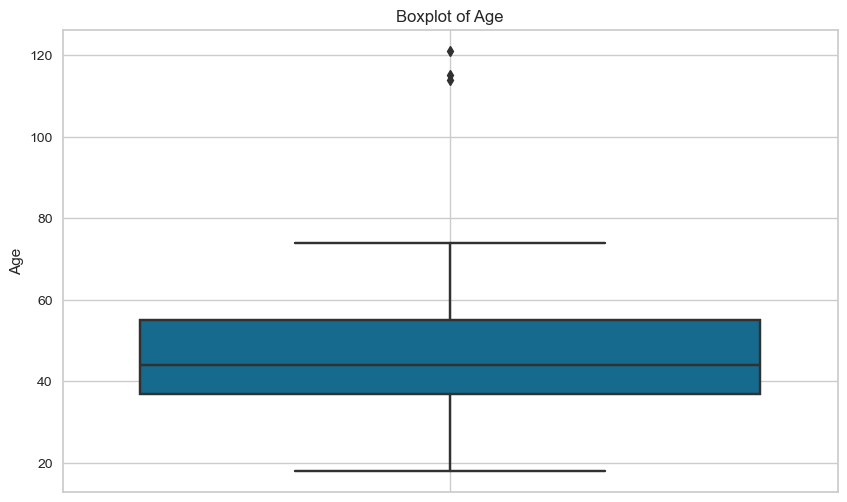

In [267]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [268]:
df = df[df['age'] < 90]

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   education               2212 non-null   object 
 1   income                  2212 non-null   float64
 2   kidhome                 2212 non-null   int64  
 3   teenhome                2212 non-null   int64  
 4   recency                 2212 non-null   int64  
 5   mnt_wines               2212 non-null   int64  
 6   mnt_fruits              2212 non-null   int64  
 7   mnt_meat_products       2212 non-null   int64  
 8   mnt_fish_products       2212 non-null   int64  
 9   mnt_sweet_products      2212 non-null   int64  
 10  mnt_gold_prods          2212 non-null   int64  
 11  num_deals_purchases     2212 non-null   int64  
 12  num_web_purchases       2212 non-null   int64  
 13  num_catalog_purchases   2212 non-null   int64  
 14  num_store_purchases     2212 non-null   int64

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

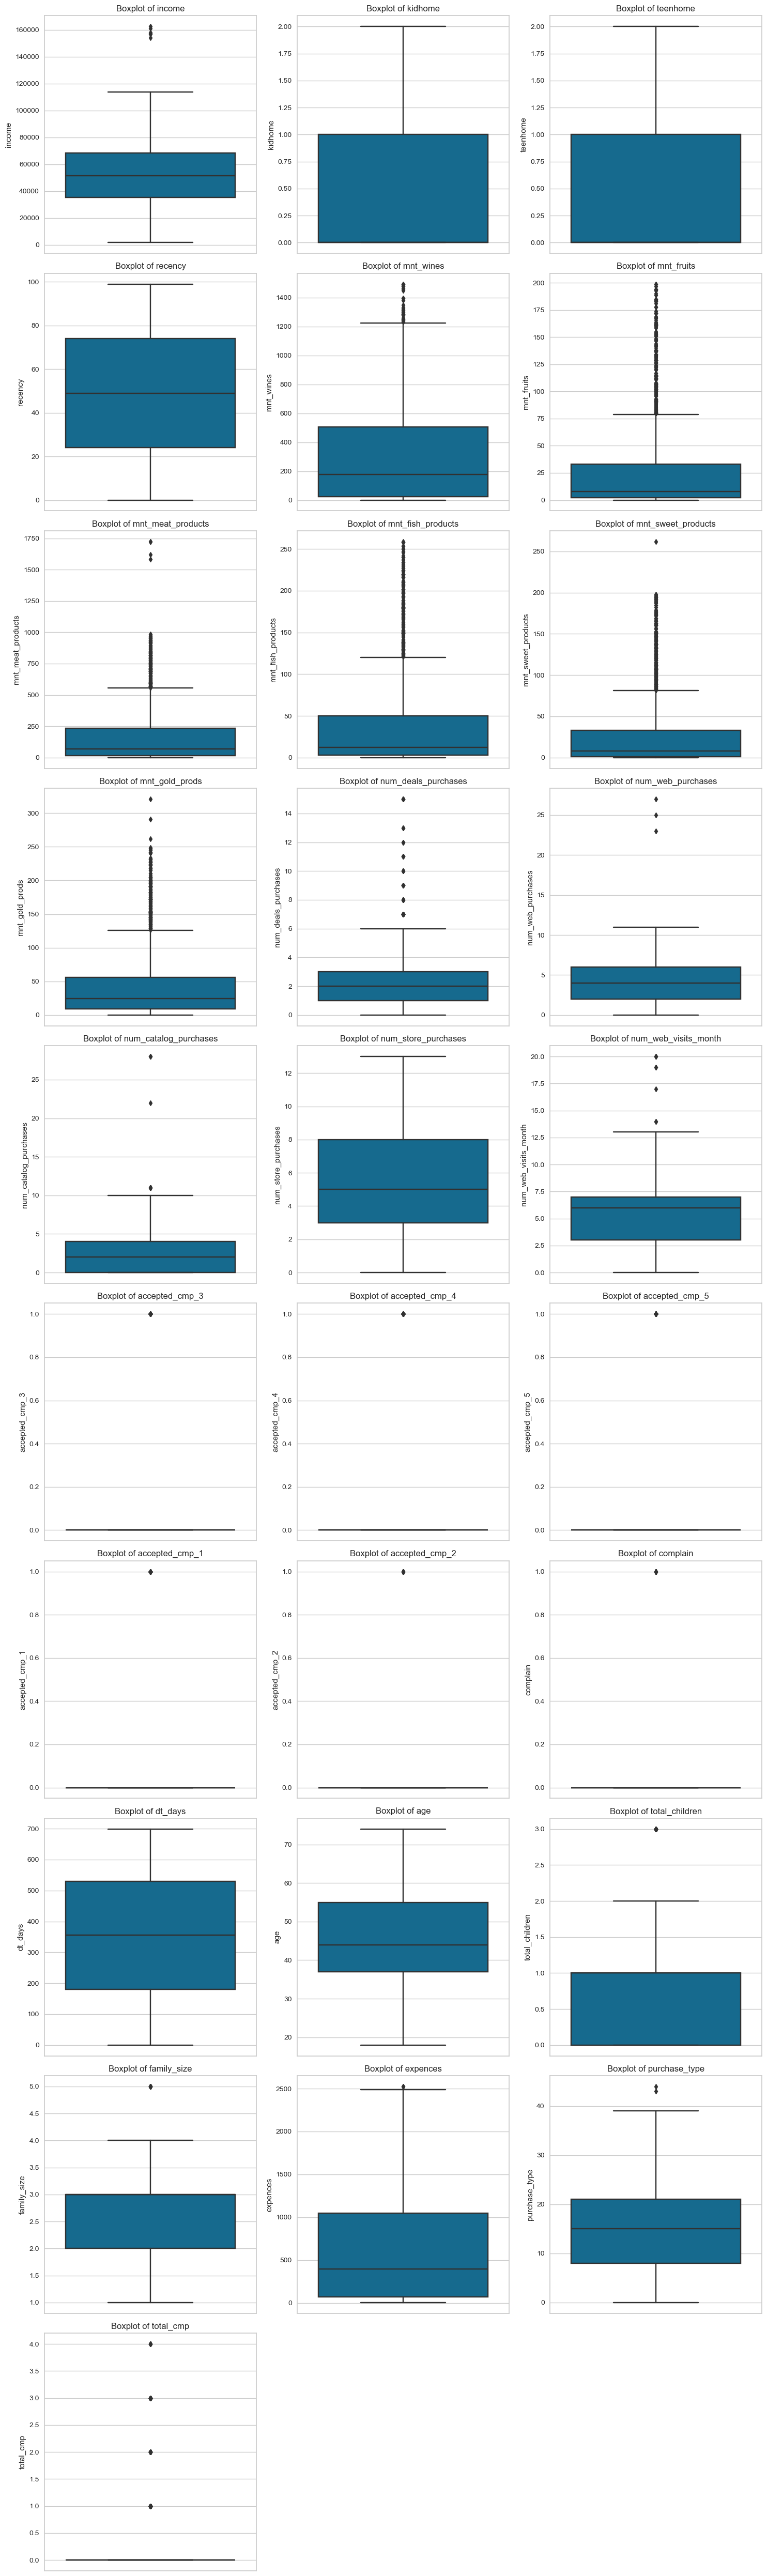

In [270]:
numeric_columns = df.select_dtypes(include=['number'])

ncols = 3
num_plots = len(numeric_columns.columns)
nrows = (num_plots - 1) // ncols + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

for i, column in enumerate(numeric_columns.columns):
    row = i // ncols
    col = i % ncols
    sns.boxplot(data=numeric_columns, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

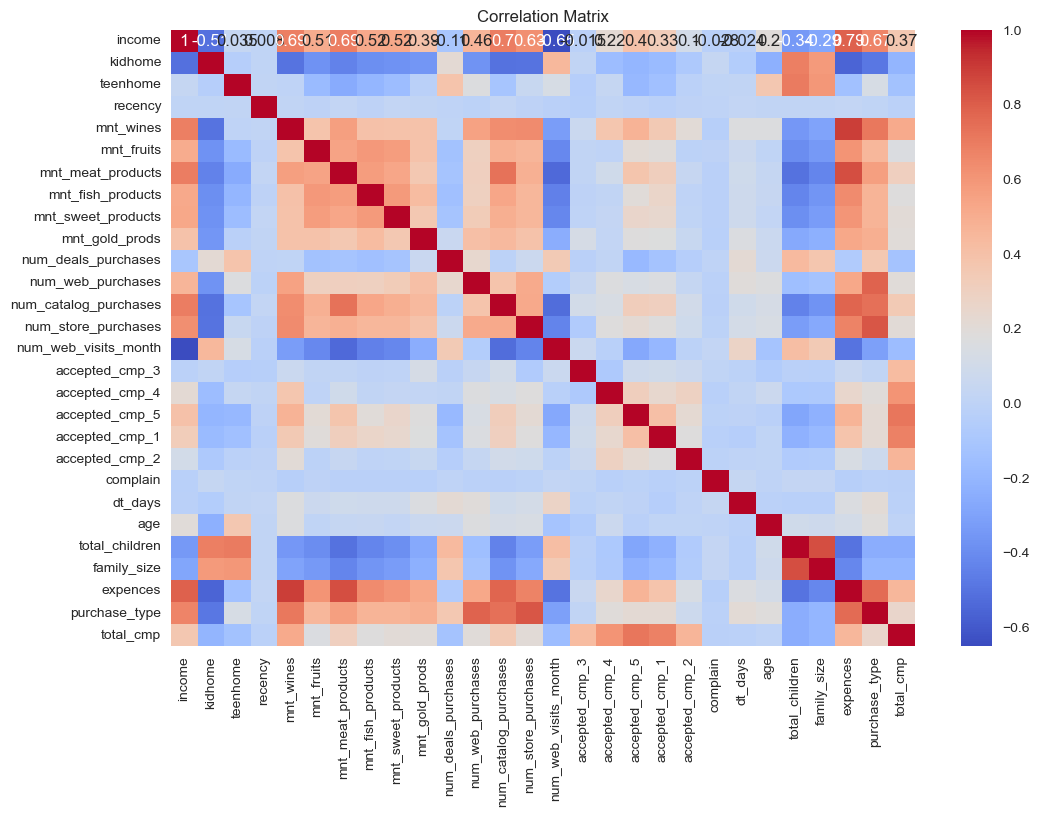

In [271]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [272]:
X = numeric_df
X.shape

(2212, 28)

In [273]:
X.columns

Index(['income', 'kidhome', 'teenhome', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5', 'accepted_cmp_1',
       'accepted_cmp_2', 'complain', 'dt_days', 'age', 'total_children',
       'family_size', 'expences', 'purchase_type', 'total_cmp'],
      dtype='object')

In [274]:
X_num = X.copy()

In [275]:
X_num.drop(columns = ['accepted_cmp_3', 'accepted_cmp_4',
       'accepted_cmp_5', 'accepted_cmp_1', 'accepted_cmp_2', 'complain'], inplace=True)
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income                 2212 non-null   float64
 1   kidhome                2212 non-null   int64  
 2   teenhome               2212 non-null   int64  
 3   recency                2212 non-null   int64  
 4   mnt_wines              2212 non-null   int64  
 5   mnt_fruits             2212 non-null   int64  
 6   mnt_meat_products      2212 non-null   int64  
 7   mnt_fish_products      2212 non-null   int64  
 8   mnt_sweet_products     2212 non-null   int64  
 9   mnt_gold_prods         2212 non-null   int64  
 10  num_deals_purchases    2212 non-null   int64  
 11  num_web_purchases      2212 non-null   int64  
 12  num_catalog_purchases  2212 non-null   int64  
 13  num_store_purchases    2212 non-null   int64  
 14  num_web_visits_month   2212 non-null   int64  
 15  dt_days  

## PCA
- We have too many features for bivariate analysis and pairplot. So we will create 3 components to have insight how our data distrubuted. 

## PCA-1


**Worked with X_num data frame: There are 21 features**

**Index(['income', 'kidhome', 'teenhome', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'dt_month', 'age', 'total_children', 'family_size', 'expences',
       'purchase_type'],
      dtype='object')**


In [276]:
# Sayısal sütunları standardize etme
scaler = StandardScaler()
scaled_X_num = scaler.fit_transform(X_num)

# Standardize edilmiş sayısal verileri DataFrame'e çevirme
X_num_scaled_df = pd.DataFrame(scaled_X_num, columns=X_num.columns)
X_num_scaled_df.head()

income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0    0.29    -0.82     -0.93     0.31       0.98        1.55   
1   -0.26     1.04      0.91    -0.38      -0.87       -0.64   
2    0.91    -0.82     -0.93    -0.80       0.36        0.57   
3   -1.18     1.04     -0.93    -0.80      -0.87       -0.56   
4    0.29     1.04     -0.93     1.55      -0.39        0.42   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0               1.69               2.45                1.48            0.85   
1              -0.72              -0.65               -0.63           -0.73   
2              -0.18               1.34               -0.15           -0.04   
3              -0.66              -0.50               -0.59           -0.75   
4              -0.22               0.15               -0.00           -0.56   

   ...  num_catalog_purchases  num_store_purchases  num_web_visits_month  \
0  ...                   2.50                -0.56                  0.69   
1  ...                  -0.57                -1.17                 -0.13   
2  ...                  -0.23                 1.29                 -0.54   
3  ...                  -0.91                -0.56                  0.28   
4  ...                   0.11                 0.06                 -0.13   

   dt_days   age  total_children  family_size  expences  purchase_type  \
0     1.53  1.02           -1.26        -1.76      1.68           1.32   
1    -1.19  1.27            1.40         0.45     -0.96          -1.16   
2    -0.21  0.33           -1.26        -0.65      0.28           0.80   
3    -1.06 -1.29            0.07         0.45     -0.92          -0.90   
4    -0.95 -1.03            0.07         0.45     -0.31           0.54   

   total_cmp  
0      -0.44  
1      -0.44  
2      -0.44  
3      -0.44  
4      -0.44  

[5 rows x 22 columns]

<Axes: >

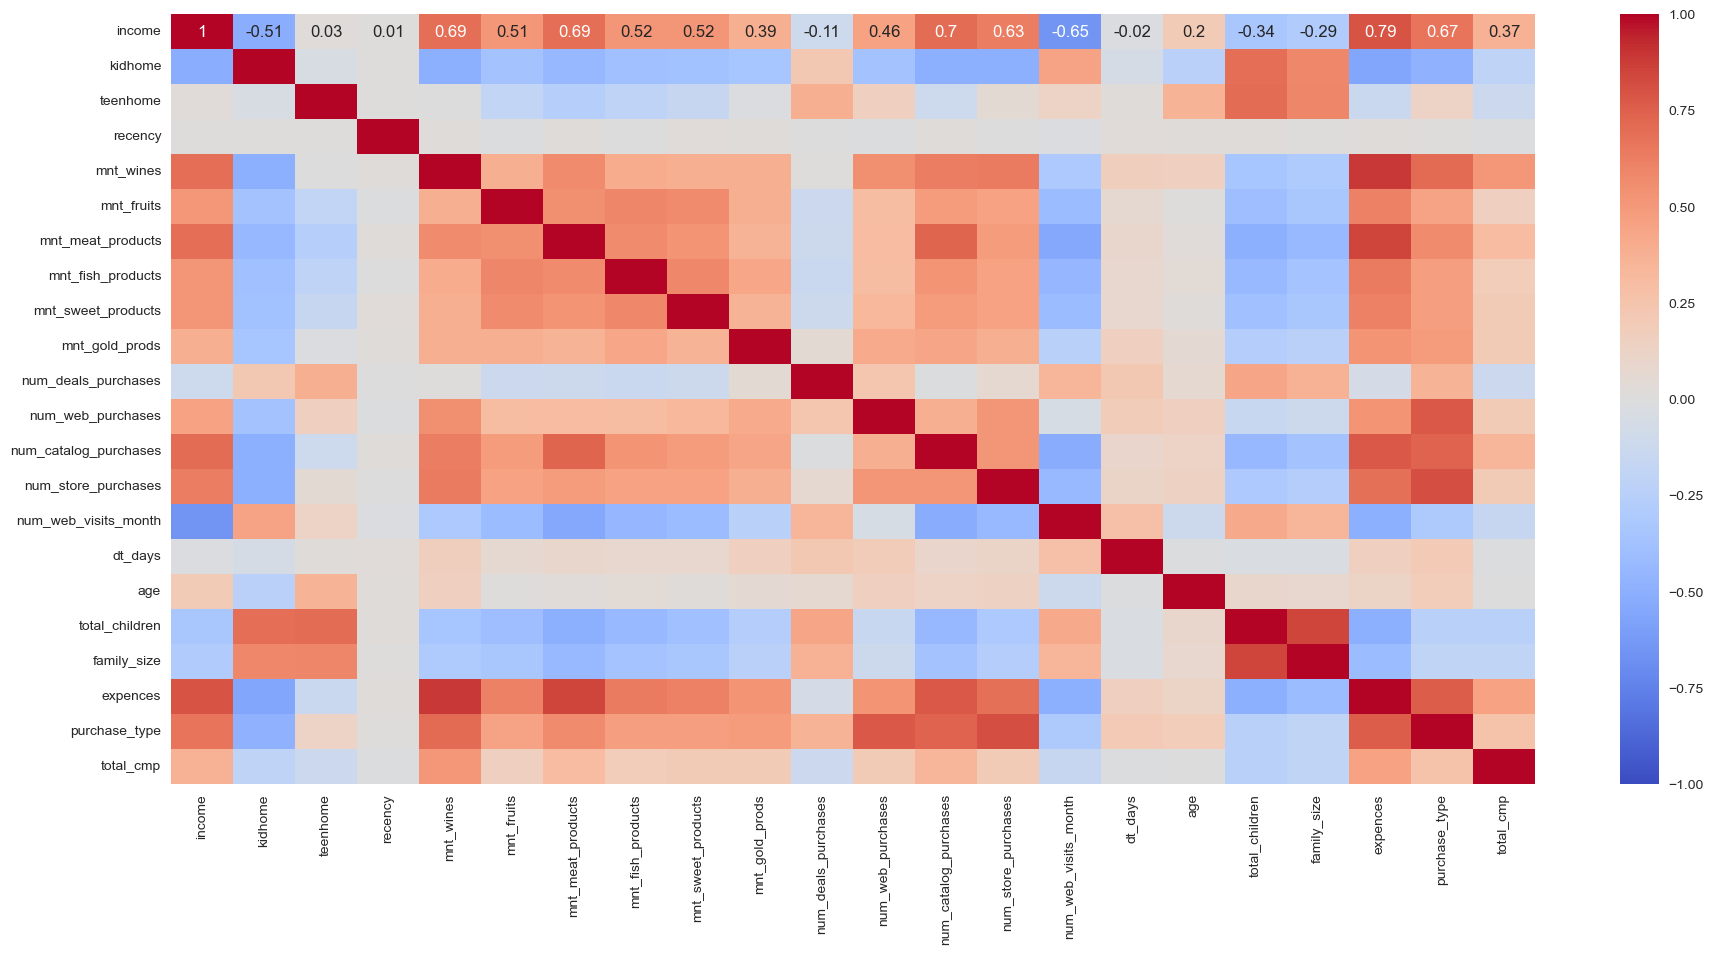

In [277]:
plt.figure(figsize=(22, 10))
sns.heatmap(X_num_scaled_df.corr().round(2), vmin=-1, vmax=1, annot=True, cmap="coolwarm")

In [278]:
pca = PCA(n_components=3)

In [279]:

principal_components = pca.fit_transform(scaled_X_num)

In [280]:
component_X_num = pd.DataFrame(data=principal_components,
                           columns=["first_component", "second_component", "third_component"])
component_X_num.describe().T

count  mean  std   min   25%   50%  75%  max
first_component    2212  0.00 2.93 -5.48 -2.70 -0.65 2.54 7.91
second_component   2212  0.00 1.70 -3.73 -1.40 -0.26 1.21 6.43
third_component    2212 -0.00 1.23 -3.53 -0.86 -0.00 0.85 6.49

In [281]:
# First component için 3D scatter plot
fig = px.scatter_3d(component_X_num, 
                    x='first_component', 
                    y='second_component', 
                    z='third_component',
                    color='first_component',  # Renklendirme first_component için
                    title='3D Projection - First Component Colored')
fig.show()

In [282]:
pca.components_

array([[ 0.28272085, -0.2359384 , -0.06415346,  0.00382887,  0.26817336,
         0.23051363,  0.27635666,  0.23978918,  0.2314339 ,  0.19358611,
        -0.04301652,  0.19257418,  0.2805458 ,  0.25450713, -0.20862469,
         0.03984611,  0.04591937, -0.21562558, -0.18837815,  0.32239972,
         0.27295186,  0.14229705],
       [ 0.07914632,  0.0623601 ,  0.45815585,  0.01584894,  0.14502441,
        -0.05354317, -0.06288595, -0.06366705, -0.04043061,  0.09284762,
         0.42246244,  0.28911267,  0.04214029,  0.15931635,  0.15293539,
         0.14997154,  0.20849147,  0.37738518,  0.35694832,  0.05367838,
         0.29291407, -0.02115335],
       [-0.24193727,  0.10266019, -0.31451855, -0.01538494,  0.03748608,
         0.01393053, -0.01115793,  0.01439872,  0.00972859,  0.1486829 ,
         0.25088341,  0.1844428 , -0.03170741, -0.01949978,  0.4474139 ,
         0.54260995, -0.38712562, -0.15484869, -0.16702553,  0.03248509,
         0.10850187,  0.0106998 ]])

In [283]:
eigenvectors_first_component = pca.components_[0]
eigenvectors_first_component

array([ 0.28272085, -0.2359384 , -0.06415346,  0.00382887,  0.26817336,
        0.23051363,  0.27635666,  0.23978918,  0.2314339 ,  0.19358611,
       -0.04301652,  0.19257418,  0.2805458 ,  0.25450713, -0.20862469,
        0.03984611,  0.04591937, -0.21562558, -0.18837815,  0.32239972,
        0.27295186,  0.14229705])

In [284]:
eigenvectors_second_component = pca.components_[1]
eigenvectors_second_component

array([ 0.07914632,  0.0623601 ,  0.45815585,  0.01584894,  0.14502441,
       -0.05354317, -0.06288595, -0.06366705, -0.04043061,  0.09284762,
        0.42246244,  0.28911267,  0.04214029,  0.15931635,  0.15293539,
        0.14997154,  0.20849147,  0.37738518,  0.35694832,  0.05367838,
        0.29291407, -0.02115335])

In [285]:
X_num_scaled_df.loc[0]

income                   0.29
kidhome                 -0.82
teenhome                -0.93
recency                  0.31
mnt_wines                0.98
mnt_fruits               1.55
mnt_meat_products        1.69
mnt_fish_products        2.45
mnt_sweet_products       1.48
mnt_gold_prods           0.85
num_deals_purchases      0.35
num_web_purchases        1.43
num_catalog_purchases    2.50
num_store_purchases     -0.56
num_web_visits_month     0.69
dt_days                  1.53
age                      1.02
total_children          -1.26
family_size             -1.76
expences                 1.68
purchase_type            1.32
total_cmp               -0.44
Name: 0, dtype: float64

In [286]:
(X_num_scaled_df.loc[0] * eigenvectors_first_component).sum()

4.745344380061637

In [287]:
component_X_num.head()

first_component  second_component  third_component
0             4.75             -0.13             2.06
1            -3.11              0.17            -2.13
2             2.30             -0.65             0.02
3            -2.87             -1.46             0.23
4            -0.36              0.22             0.40

## Finding optimal number of components

In [288]:
pca.explained_variance_ 

array([8.59059739, 2.89268479, 1.5093185 ])

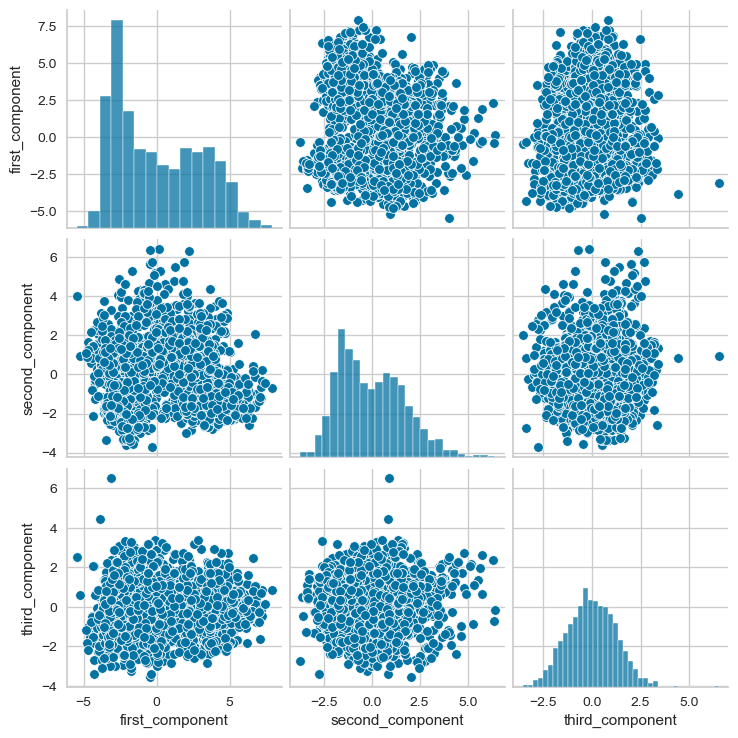

In [289]:
sns.pairplot(component_X_num);

<Axes: >

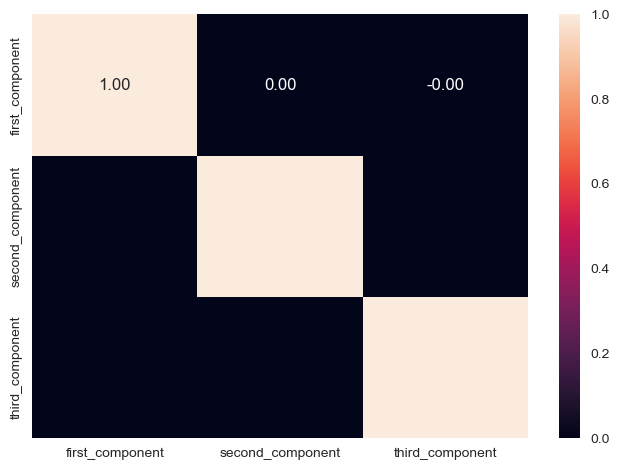

In [290]:
sns.heatmap(component_X_num.corr(), annot=True, fmt=".2f")

In [291]:
pca.explained_variance_ratio_

array([0.39030517, 0.13142623, 0.06857437])

In [292]:
pca.explained_variance_ratio_.cumsum()

array([0.39030517, 0.5217314 , 0.59030577])

Text(0, 0.5, 'Variance Ratio')

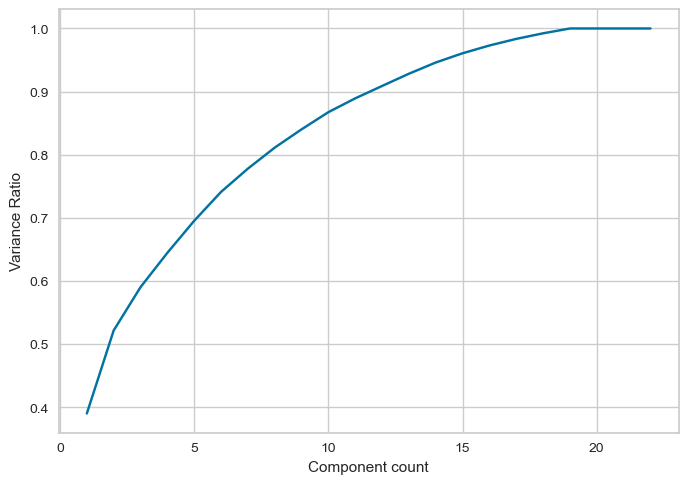

In [293]:
x = range(1,23)
pca = PCA().fit(scaled_X_num)
plt.plot(x, pca.explained_variance_ratio_.cumsum())
# plt.plot rearranges PCA's n_components hyper_parameter to n_components=x
# for each x value and calculates how much information the components carry
# on them in total for all values x will take up to 1, 2, 3 .......30
# Returns cumulative totals with representation.
plt.xlabel("Component count")
plt.ylabel("Variance Ratio")

In [294]:
pca = PCA(n_components=22).fit(scaled_X_num)

In [295]:
my_dict = {"explained_variance": pca.explained_variance_,
           "explained_variance_ratio": pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio": pca.explained_variance_ratio_.cumsum()}


In [296]:
df_ev = pd.DataFrame(my_dict, index=range(1,23))
df_ev

explained_variance  explained_variance_ratio  \
1                 8.59                      0.39   
2                 2.89                      0.13   
3                 1.51                      0.07   
4                 1.20                      0.05   
5                 1.12                      0.05   
6                 1.01                      0.05   
7                 0.81                      0.04   
8                 0.73                      0.03   
9                 0.64                      0.03   
10                0.60                      0.03   
11                0.48                      0.02   
12                0.43                      0.02   
13                0.43                      0.02   
14                0.39                      0.02   
15                0.32                      0.01   
16                0.27                      0.01   
17                0.23                      0.01   
18                0.19                      0.01   
19                0.17                      0.01   
20                0.00                      0.00   
21                0.00                      0.00   
22                0.00                      0.00   

    cumsum_explained_variance_ratio  
1                              0.39  
2                              0.52  
3                              0.59  
4                              0.64  
5                              0.70  
6                              0.74  
7                              0.78  
8                              0.81  
9                              0.84  
10                             0.87  
11                             0.89  
12                             0.91  
13                             0.93  
14                             0.95  
15                             0.96  
16                             0.97  
17                             0.98  
18                             0.99  
19                             1.00  
20                             1.00  
21                             1.00  
22                             1.00

In [297]:
df_ev.explained_variance.sum()
# The sum of explained_variance of all components is always equal to the total number of features.

22.009950248756223

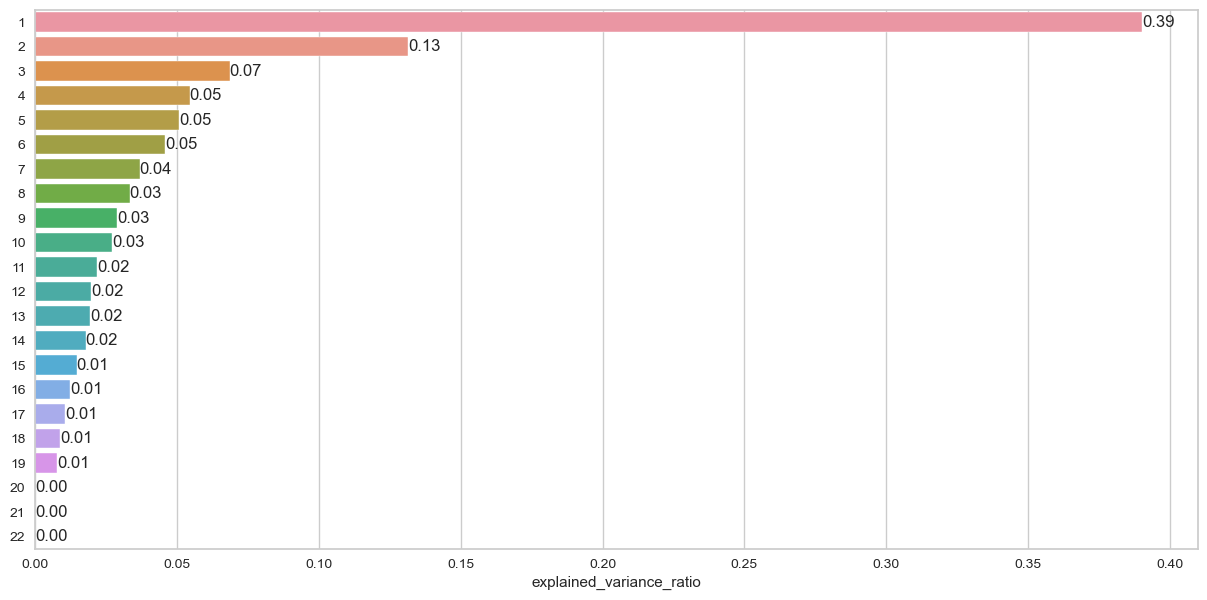

In [298]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(y=df_ev.index,
                 x=df_ev.explained_variance_ratio,
                orient='horizontal')
ax.bar_label(ax.containers[0], fmt="%.2f");

## PCA-2

In [299]:
df0 = X_num.copy()
df0['income_log'] = np.log1p(df0['income'])  # log(1 + income) dönüşümü

In [300]:
scaler = MinMaxScaler()
scaled_X1 = scaler.fit_transform(df0.drop(columns=['income']))  

In [301]:
X1_scaled_df = pd.DataFrame(scaled_X1, columns=df0.columns.drop('income'))

X1_scaled_df.head()

kidhome  teenhome  recency  mnt_wines  mnt_fruits  mnt_meat_products  \
0        0         0     0.59       0.43        0.44               0.32   
1     0.50      0.50     0.38       0.01        0.01               0.00   
2        0         0     0.26       0.29        0.25               0.07   
3     0.50         0     0.26       0.01        0.02               0.01   
4     0.50         0     0.95       0.12        0.22               0.07   

   mnt_fish_products  mnt_sweet_products  mnt_gold_prods  num_deals_purchases  \
0               0.66                0.34            0.27                 0.20   
1               0.01                0.00            0.02                 0.13   
2               0.43                0.08            0.13                 0.07   
3               0.04                0.01            0.02                 0.13   
4               0.18                0.10            0.05                 0.33   

   ...  num_store_purchases  num_web_visits_month  dt_days  age  \
0  ...                 0.31                  0.35     0.95 0.70   
1  ...                 0.15                  0.25     0.16 0.75   
2  ...                 0.77                  0.20     0.45 0.55   
3  ...                 0.31                  0.30     0.20 0.21   
4  ...                 0.46                  0.25     0.23 0.27   

   total_children  family_size  expences  purchase_type  total_cmp  income_log  
0               0            0      0.64           0.57          0        0.77  
1            0.67         0.50      0.01           0.14          0        0.72  
2               0         0.25      0.31           0.48          0        0.82  
3            0.33         0.50      0.02           0.18          0        0.60  
4            0.33         0.50      0.17           0.43          0        0.77  

[5 rows x 22 columns]

<Axes: >

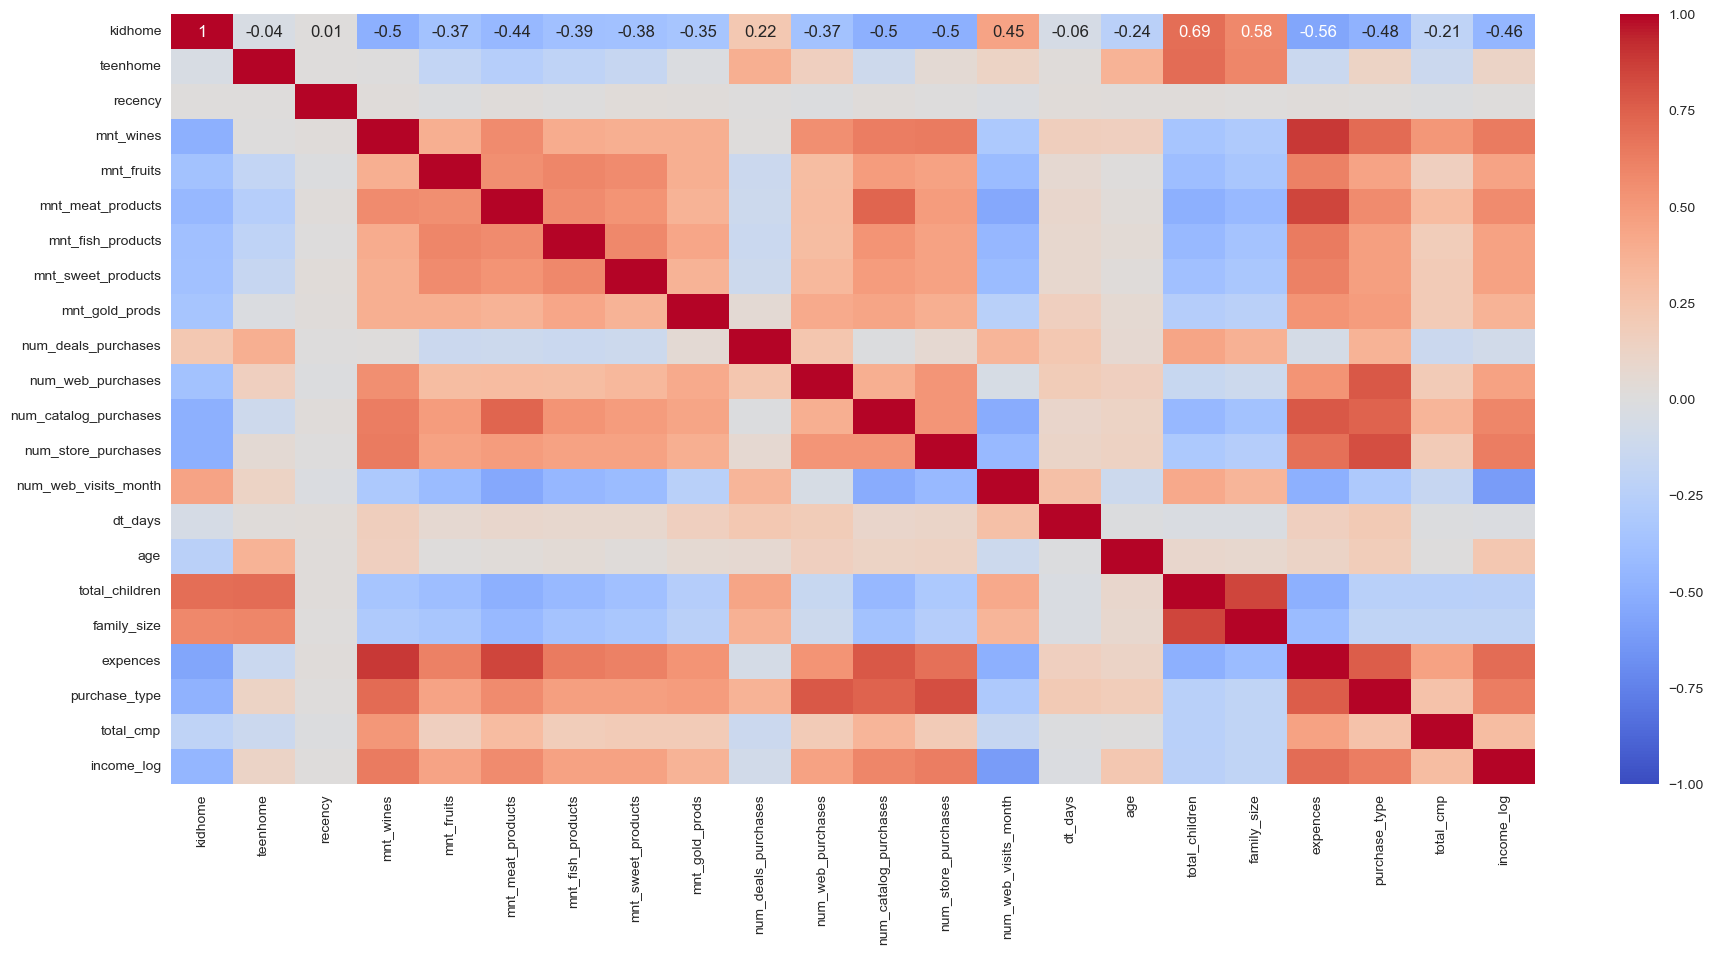

In [302]:
plt.figure(figsize=(22, 10))
sns.heatmap(X1_scaled_df.corr().round(2), vmin=-1, vmax=1, annot=True, cmap="coolwarm")

In [303]:
pca = PCA(n_components=3)

In [304]:
principal_components = pca.fit_transform(scaled_X1)

In [305]:
component_X1 = pd.DataFrame(data=principal_components,
                           columns=["first_component", "second_component", "third_component"])
component_X1.describe().T

count  mean  std   min   25%   50%  75%  max
first_component    2212  0.00 0.57 -1.19 -0.49 -0.10 0.49 1.47
second_component   2212 -0.00 0.37 -0.87 -0.33 -0.02 0.28 1.32
third_component    2212  0.00 0.30 -0.79 -0.22  0.01 0.21 0.85

In [306]:
# First component için 3D scatter plot
fig = px.scatter_3d(component_X1, 
                    x='first_component', 
                    y='second_component', 
                    z='third_component',
                    color='first_component',  # Renklendirme first_component için
                    title='3D Projection - First Component Colored')
fig.show()

In [307]:
pca.components_

array([[-0.35411942, -0.13308245,  0.00239596,  0.30596062,  0.23086823,
         0.17472654,  0.25585927,  0.1770189 ,  0.15203496, -0.04066598,
         0.09221164,  0.13926741,  0.32433349, -0.11984627,  0.07791772,
         0.03801466, -0.32480125, -0.26090059,  0.38317262,  0.22717153,
         0.11937564,  0.1290723 ],
       [-0.02273018,  0.62701461,  0.05103528,  0.19787186,  0.00680635,
        -0.00195722, -0.00202897,  0.01222441,  0.07646964,  0.17905473,
         0.11335649,  0.04095751,  0.2398392 ,  0.0222994 ,  0.18496394,
         0.24172528,  0.40285629,  0.34746787,  0.12723214,  0.2275265 ,
         0.00524527,  0.10131733],
       [ 0.15115296, -0.17730701,  0.61137097,  0.0048448 , -0.00759179,
         0.00877998,  0.00309498,  0.00784337,  0.0376843 ,  0.06576685,
         0.00980508, -0.00591778, -0.05869122,  0.12722969,  0.7187228 ,
        -0.15154159, -0.01743603, -0.02142211,  0.01421476,  0.00733083,
        -0.0292514 , -0.069289  ]])

In [308]:
eigenvectors_first_component = pca.components_[0]
eigenvectors_first_component

array([-0.35411942, -0.13308245,  0.00239596,  0.30596062,  0.23086823,
        0.17472654,  0.25585927,  0.1770189 ,  0.15203496, -0.04066598,
        0.09221164,  0.13926741,  0.32433349, -0.11984627,  0.07791772,
        0.03801466, -0.32480125, -0.26090059,  0.38317262,  0.22717153,
        0.11937564,  0.1290723 ])

In [309]:
eigenvectors_second_component = pca.components_[1]
eigenvectors_second_component

array([-0.02273018,  0.62701461,  0.05103528,  0.19787186,  0.00680635,
       -0.00195722, -0.00202897,  0.01222441,  0.07646964,  0.17905473,
        0.11335649,  0.04095751,  0.2398392 ,  0.0222994 ,  0.18496394,
        0.24172528,  0.40285629,  0.34746787,  0.12723214,  0.2275265 ,
        0.00524527,  0.10131733])

In [310]:
X1_scaled_df.loc[0]

kidhome                    0
teenhome                   0
recency                 0.59
mnt_wines               0.43
mnt_fruits              0.44
mnt_meat_products       0.32
mnt_fish_products       0.66
mnt_sweet_products      0.34
mnt_gold_prods          0.27
num_deals_purchases     0.20
num_web_purchases       0.30
num_catalog_purchases   0.36
num_store_purchases     0.31
num_web_visits_month    0.35
dt_days                 0.95
age                     0.70
total_children             0
family_size                0
expences                0.64
purchase_type           0.57
total_cmp                  0
income_log              0.77
Name: 0, dtype: float64

In [311]:
(X1_scaled_df.loc[0] * eigenvectors_first_component).sum()

component_X1.head()

first_component  second_component  third_component
0             0.93             -0.11             0.40
1            -0.72              0.10            -0.36
2             0.55             -0.20            -0.21
3            -0.51             -0.43            -0.23
4            -0.15             -0.17             0.20

## Finding optimal number of components

In [312]:
#sns.pairplot(component_X_num);

<Axes: >

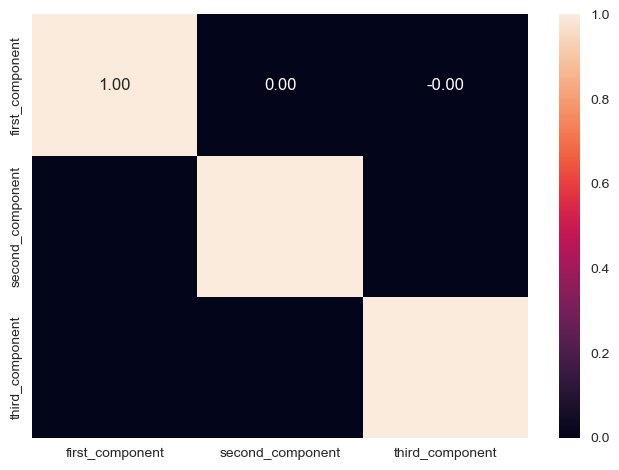

In [313]:
sns.heatmap(component_X1.corr(), annot=True, fmt=".2f")

In [314]:
pca.explained_variance_ratio_

array([0.35382394, 0.15237661, 0.0952361 ])

In [315]:
pca.explained_variance_ratio_.cumsum()

array([0.35382394, 0.50620056, 0.60143666])

Text(0, 0.5, 'Variance Ratio')

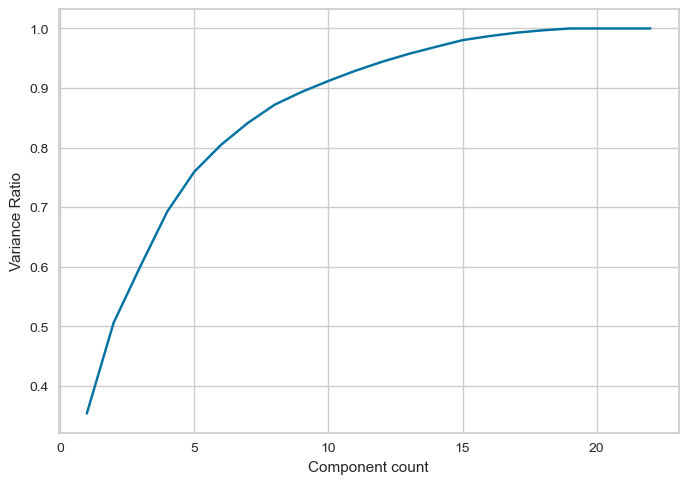

In [316]:
x = range(1,23)
pca = PCA().fit(scaled_X1)
plt.plot(x, pca.explained_variance_ratio_.cumsum())
# plt.plot rearranges PCA's n_components hyper_parameter to n_components=x
# for each x value and calculates how much information the components carry
# on them in total for all values x will take up to 1, 2, 3 .......30
# Returns cumulative totals with representation.
plt.xlabel("Component count")
plt.ylabel("Variance Ratio")

In [317]:
pca = PCA(n_components=22).fit(scaled_X1)

In [318]:
my_dict = {"explained_variance": pca.explained_variance_,
           "explained_variance_ratio": pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio": pca.explained_variance_ratio_.cumsum()}

In [319]:
df_ev = pd.DataFrame(my_dict, index=range(1,23))
df_ev

explained_variance  explained_variance_ratio  \
1                 0.33                      0.35   
2                 0.14                      0.15   
3                 0.09                      0.10   
4                 0.08                      0.09   
5                 0.06                      0.07   
6                 0.04                      0.05   
7                 0.03                      0.04   
8                 0.03                      0.03   
9                 0.02                      0.02   
10                0.02                      0.02   
11                0.02                      0.02   
12                0.01                      0.02   
13                0.01                      0.01   
14                0.01                      0.01   
15                0.01                      0.01   
16                0.01                      0.01   
17                0.01                      0.01   
18                0.00                      0.00   
19                0.00                      0.00   
20                0.00                      0.00   
21                0.00                      0.00   
22                0.00                      0.00   

    cumsum_explained_variance_ratio  
1                              0.35  
2                              0.51  
3                              0.60  
4                              0.69  
5                              0.76  
6                              0.80  
7                              0.84  
8                              0.87  
9                              0.89  
10                             0.91  
11                             0.93  
12                             0.94  
13                             0.96  
14                             0.97  
15                             0.98  
16                             0.99  
17                             0.99  
18                             1.00  
19                                1  
20                                1  
21                                1  
22                                1

In [320]:
df_ev.explained_variance.sum()

0.9196763849066505

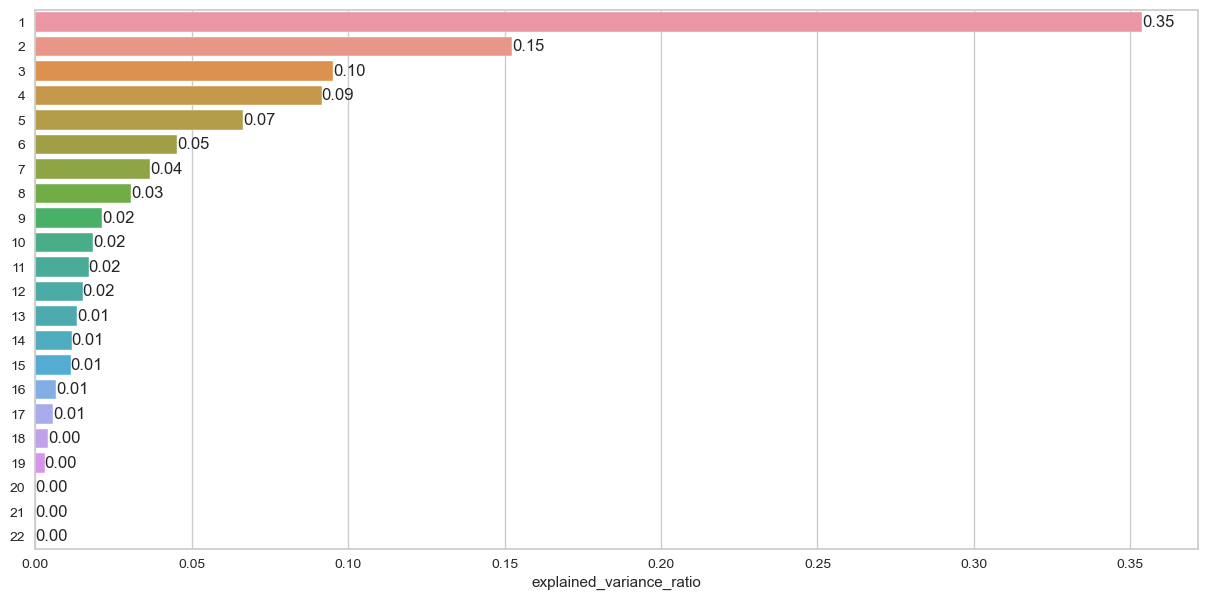

In [321]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(y=df_ev.index,
                 x=df_ev.explained_variance_ratio,
                orient='horizontal')
ax.bar_label(ax.containers[0], fmt="%.2f");

## PCA-3


**Worked with X2 data frame: There are 8 features**

**Index(['income', 'recency', 'dt_month', 'age', 'total_children', 'family_size',
       'expences', 'purchase_type'],
      dtype='object')**

In [322]:
X2 = X_num.copy()

In [323]:
X2.columns

Index(['income', 'kidhome', 'teenhome', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'dt_days', 'age', 'total_children', 'family_size', 'expences',
       'purchase_type', 'total_cmp'],
      dtype='object')

In [324]:
X2.drop(columns = ['kidhome', 'teenhome', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month'], inplace=True)

In [325]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   income          2212 non-null   float64
 1   recency         2212 non-null   int64  
 2   dt_days         2212 non-null   int64  
 3   age             2212 non-null   int64  
 4   total_children  2212 non-null   int64  
 5   family_size     2212 non-null   int64  
 6   expences        2212 non-null   int64  
 7   purchase_type   2212 non-null   int64  
 8   total_cmp       2212 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 172.8 KB


In [326]:
scaler = StandardScaler()
scaled_X2 = scaler.fit_transform(X2)

# Standardize edilmiş sayısal verileri DataFrame'e çevirme
X2_scaled_df = pd.DataFrame(scaled_X2, columns=X2.columns)
X2_scaled_df.head()

income  recency  dt_days   age  total_children  family_size  expences  \
0    0.29     0.31     1.53  1.02           -1.26        -1.76      1.68   
1   -0.26    -0.38    -1.19  1.27            1.40         0.45     -0.96   
2    0.91    -0.80    -0.21  0.33           -1.26        -0.65      0.28   
3   -1.18    -0.80    -1.06 -1.29            0.07         0.45     -0.92   
4    0.29     1.55    -0.95 -1.03            0.07         0.45     -0.31   

   purchase_type  total_cmp  
0           1.32      -0.44  
1          -1.16      -0.44  
2           0.80      -0.44  
3          -0.90      -0.44  
4           0.54      -0.44

In [327]:
pca2 = PCA(n_components=3)

In [328]:

principal_components_2 = pca2.fit_transform(scaled_X2)

component_X2 = pd.DataFrame(data=principal_components_2,
                           columns=["first_component", "second_component", "third_component"])
component_X2.describe()

first_component  second_component  third_component
count             2212              2212             2212
mean              0.00              0.00             0.00
std               1.82              1.21             1.03
min              -3.70             -3.60            -2.65
25%              -1.53             -0.87            -0.78
50%              -0.33              0.02             0.00
75%               1.41              0.82             0.78
max               5.42              4.51             3.17

In [329]:
pca2.components_

array([[ 0.44987944,  0.00181196,  0.07477844,  0.06998342, -0.38287575,
        -0.35295531,  0.50770778,  0.41659346,  0.29090741],
       [ 0.25775847,  0.07363839,  0.11813412,  0.46674683,  0.51203647,
         0.53921968,  0.14843766,  0.34703531,  0.03038463],
       [ 0.16670741, -0.3356187 , -0.85701414,  0.23138534,  0.01519935,
         0.02523968, -0.04022083, -0.13619153,  0.2247719 ]])

In [330]:
eigenvectors_first_component = pca2.components_[0]
eigenvectors_first_component

array([ 0.44987944,  0.00181196,  0.07477844,  0.06998342, -0.38287575,
       -0.35295531,  0.50770778,  0.41659346,  0.29090741])

In [331]:
eigenvectors_second_component = pca2.components_[1]
eigenvectors_second_component


array([0.25775847, 0.07363839, 0.11813412, 0.46674683, 0.51203647,
       0.53921968, 0.14843766, 0.34703531, 0.03038463])

In [332]:
X2_scaled_df.loc[0]

income            0.29
recency           0.31
dt_days           1.53
age               1.02
total_children   -1.26
family_size      -1.76
expences          1.68
purchase_type     1.32
total_cmp        -0.44
Name: 0, dtype: float64

In [333]:
(X2_scaled_df.loc[0] * eigenvectors_first_component).sum()

component_X2.head()

first_component  second_component  third_component
0             2.69             -0.15            -1.54
1            -1.91              0.76             1.53
2             1.48             -0.39             0.42
3            -1.85             -1.27             0.75
4            -0.25              0.00            -0.04

In [334]:
pca2.explained_variance_ 

array([3.2980399 , 1.47439487, 1.06394174])

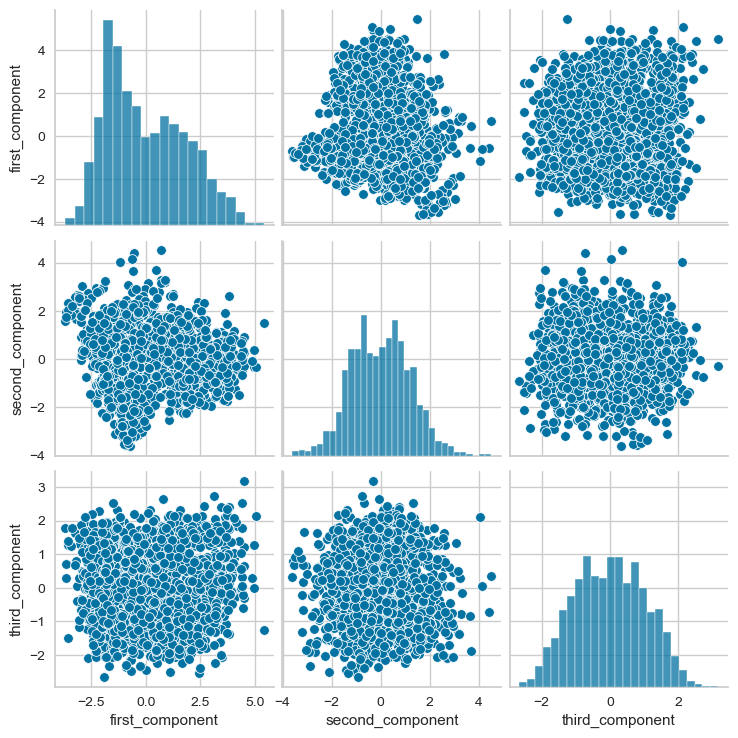

In [335]:
sns.pairplot(component_X2);

<Axes: >

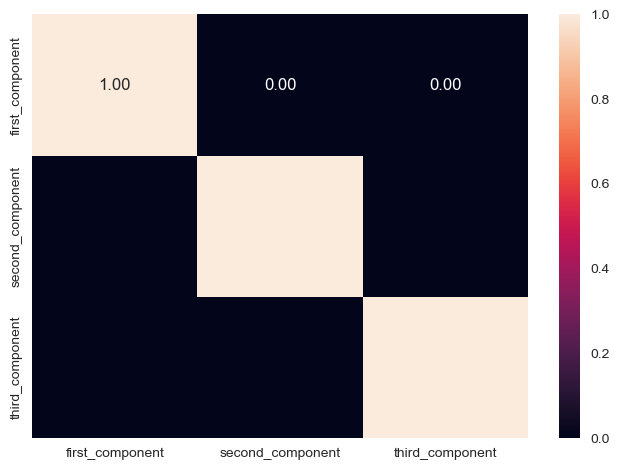

In [336]:
sns.heatmap(component_X2.corr(), annot=True, fmt=".2f")

In [337]:
pca2.explained_variance_ratio_

array([0.36628321, 0.16374759, 0.11816231])

In [338]:
pca2.explained_variance_ratio_.cumsum()

array([0.36628321, 0.5300308 , 0.64819311])

Text(0, 0.5, 'Variance Ratio')

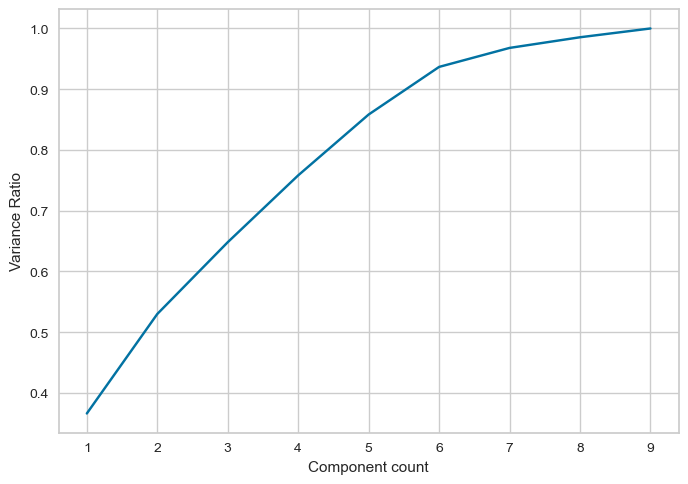

In [339]:
x = range(1,10)
pca2 = PCA().fit(scaled_X2)
plt.plot(x, pca2.explained_variance_ratio_.cumsum())
# plt.plot rearranges PCA's n_components hyper_parameter to n_components=x
# for each x value and calculates how much information the components carry
# on them in total for all values x will take up to 1, 2, 3 .......30
# Returns cumulative totals with representation.
plt.xlabel("Component count")
plt.ylabel("Variance Ratio")

In [340]:
pca2 = PCA(n_components=9).fit(scaled_X2)

In [341]:
my_dict = {"explained_variance": pca2.explained_variance_,
           "explained_variance_ratio": pca2.explained_variance_ratio_,
           "cumsum_explained_variance_ratio": pca2.explained_variance_ratio_.cumsum()}

In [342]:
df_ev = pd.DataFrame(my_dict, index=range(1,10))
df_ev

explained_variance  explained_variance_ratio  \
1                3.30                      0.37   
2                1.47                      0.16   
3                1.06                      0.12   
4                0.99                      0.11   
5                0.90                      0.10   
6                0.71                      0.08   
7                0.28                      0.03   
8                0.16                      0.02   
9                0.13                      0.01   

   cumsum_explained_variance_ratio  
1                             0.37  
2                             0.53  
3                             0.65  
4                             0.76  
5                             0.86  
6                             0.94  
7                             0.97  
8                             0.99  
9                                1

In [343]:
df_ev.explained_variance.sum()

9.00407055630935

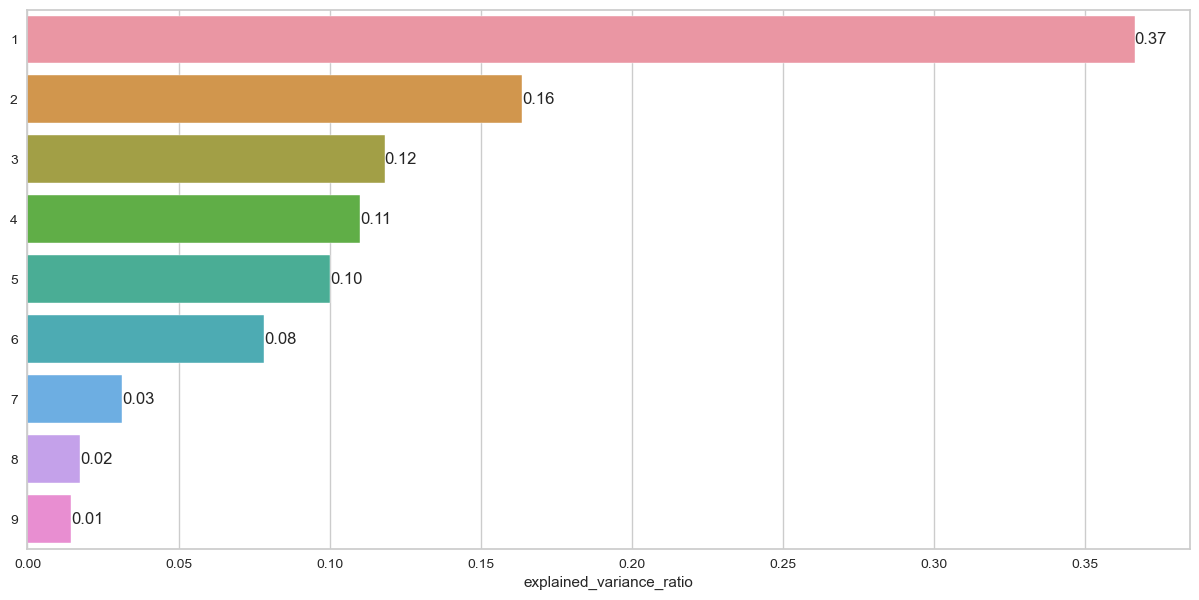

In [344]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(y=df_ev.index,
                 x=df_ev.explained_variance_ratio,
                orient='horizontal')
ax.bar_label(ax.containers[0], fmt="%.2f");

# 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.

The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of purchases and Income
- **Spender Customers** --  Income is less but purcheses high, so can also be treated as potential target customer.

## K-means Clsutering

### Create a new dataset with numeric features

**With PCA-1**

In [345]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income                 2212 non-null   float64
 1   kidhome                2212 non-null   int64  
 2   teenhome               2212 non-null   int64  
 3   recency                2212 non-null   int64  
 4   mnt_wines              2212 non-null   int64  
 5   mnt_fruits             2212 non-null   int64  
 6   mnt_meat_products      2212 non-null   int64  
 7   mnt_fish_products      2212 non-null   int64  
 8   mnt_sweet_products     2212 non-null   int64  
 9   mnt_gold_prods         2212 non-null   int64  
 10  num_deals_purchases    2212 non-null   int64  
 11  num_web_purchases      2212 non-null   int64  
 12  num_catalog_purchases  2212 non-null   int64  
 13  num_store_purchases    2212 non-null   int64  
 14  num_web_visits_month   2212 non-null   int64  
 15  dt_days  

In [346]:
X_num.shape

(2212, 22)

In [347]:
pca = PCA(n_components=3)
# We can choose any of the 3 components corresponding to 73% information
# and 6 components corresponding to 89% information. We can decide
# this by checking model scores.

# We may prefer 2 or 3 because of the meaningful correlation between
# our features and to visualize the components that will actually be
# the summary of all my feats.

# We prefer 2 for this data. You can select all 3 and look at the 3D image.





In [348]:
principal_components = pca.fit_transform(scaled_X_num)
principal_components

array([[ 4.74535257, -0.12914254,  2.06085285],
       [-3.10930367,  0.17391396, -2.12941581],
       [ 2.29734963, -0.6482185 ,  0.01972104],
       ...,
       [ 2.37671721, -1.62064853,  0.36187422],
       [ 1.95738097,  1.25227929, -1.78164855],
       [-2.57922333,  1.86875588, -0.27434664]])

In [349]:
component_X = pd.DataFrame(data=principal_components,
                           columns=["first_component", "second_component", "third_compenent"])
component_X

first_component  second_component  third_compenent
0                4.75             -0.13             2.06
1               -3.11              0.17            -2.13
2                2.30             -0.65             0.02
3               -2.87             -1.46             0.23
4               -0.36              0.22             0.40
...               ...               ...              ...
2207             2.61              1.59             0.42
2208            -2.13              4.64            -1.46
2209             2.38             -1.62             0.36
2210             1.96              1.25            -1.78
2211            -2.58              1.87            -0.27

[2212 rows x 3 columns]

#### Determine optimal number of clusters

### inertia

In [350]:
def elbow_vis(X_num, k_range=range(2, 11), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X_num)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42)
            kmeanModel.fit(X_num)
            distances = kmeanModel.transform(
                X_num
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

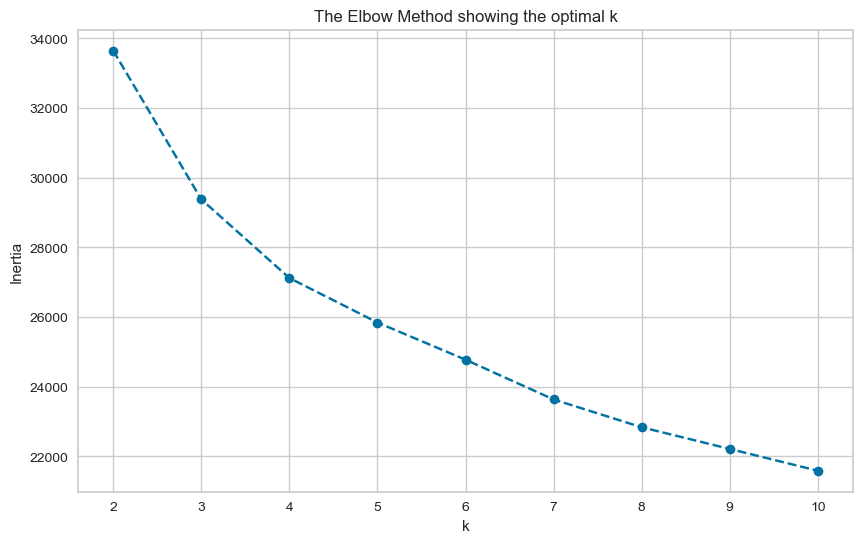

In [351]:
elbow_vis(scaled_X_num, k_range=range(2, 11), inertia=True)

### distortion

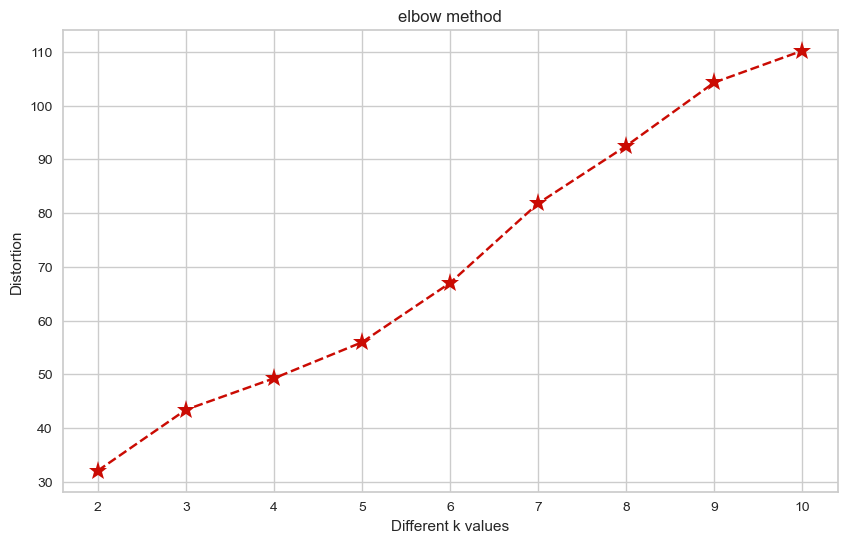

In [352]:
elbow_vis(scaled_X_num, k_range=range(2, 11), inertia=False)

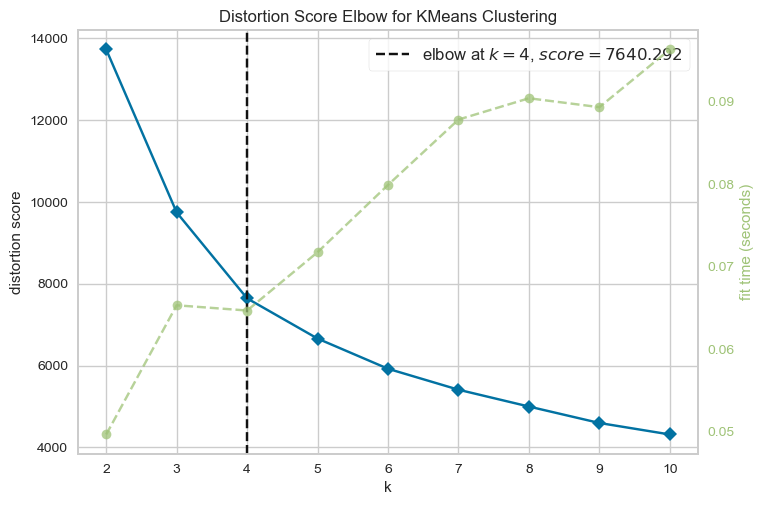

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [353]:
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(component_X)
Elbow_M.show()

### silhoutte score

In [354]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(component_X_num)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(component_X_num, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.45419180862875197
For n_clusters=3, the silhouette score is 0.4064525284488154
For n_clusters=4, the silhouette score is 0.3761596782030614
For n_clusters=5, the silhouette score is 0.35643929333117025
For n_clusters=6, the silhouette score is 0.3569484470803752
For n_clusters=7, the silhouette score is 0.32840578737980963
For n_clusters=8, the silhouette score is 0.3270123640305798


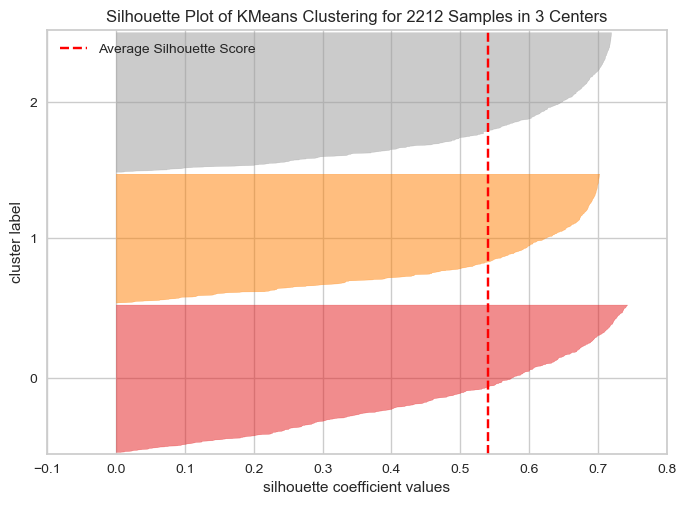

In [355]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_num)    # Fit the data to the visualizer
visualizer.poof();   

#### Apply K Means

In [356]:
from sklearn.cluster import KMeans

# Optimal küme sayısını belirleme
optimal_k = 3  # 4 veya 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_X_num)

# Küme etiketlerini elde etme
clusters = kmeans.labels_
df['cluster'] = clusters

df.head()

education  income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0       Graduate   58138        0         0       58        635          88   
1       Graduate   46344        1         1       38         11           1   
2       Graduate   71613        0         0       26        426          49   
3       Graduate   26646        1         0       26         11           4   
4  Post Graduate   58293        1         0       94        173          43   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  ...  complain  \
0                546                172                  88  ...         0   
1                  6                  2                   1  ...         0   
2                127                111                  21  ...         0   
3                 20                 10                   3  ...         0   
4                118                 46                  27  ...         0   

   dt_days  age  total_children  marital_status_summary  family_size  \
0      663   57               0                  single            1   
1      113   60               2                  single            3   
2      312   49               0                together            2   
3      139   30               1                together            3   
4      161   33               1                together            3   

   expences  purchase_type  total_cmp  cluster  
0      1617             25          0        2  
1        27              6          0        1  
2       776             21          0        2  
3        53              8          0        1  
4       422             19          0        0  

[5 rows x 31 columns]

#### Visualizing and Labeling All the Clusters

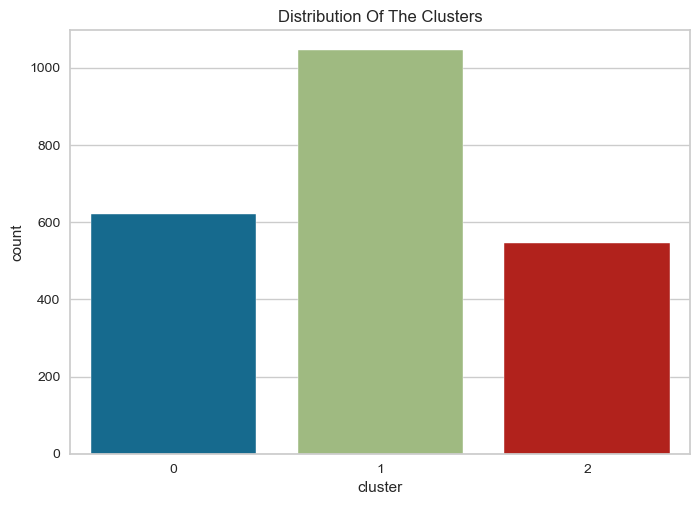

In [357]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

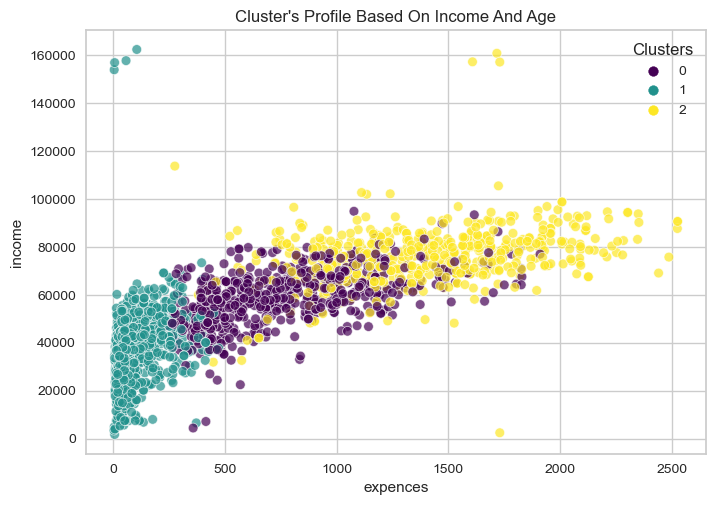

In [358]:
pal = sns.color_palette("viridis", as_cmap=True)
pl = sns.scatterplot(data=df, x="expences", y="income", hue="cluster", alpha = 0.7, palette=pal)
pl.set_title("Cluster's Profile Based On Income And Age")
plt.legend(title='Clusters')
plt.show()

In [359]:
df['cluster'].value_counts()

cluster
1    1045
0     622
2     545
Name: count, dtype: int64

In [360]:
clusters = range(3)  # 0, 1, 2, 3

cluster_means = []

# Her küme için ortalama 'income' ve 'expences' değerlerini hesapla
for cluster in clusters:
    cluster_data = df[df['cluster'] == cluster][['income', 'expences']].mean()
    cluster_means.append({
        'cluster': cluster,
        'income_mean': cluster_data['income'],
        'expences_mean': cluster_data['expences']
    })

cluster_means_df = pd.DataFrame(cluster_means)

cluster_means_df

cluster  income_mean  expences_mean
0        0    58,730.30         767.18
1        1    35,170.65         101.01
2        2    76,420.76       1,395.48

**Income vs spending plot shows the clusters pattern**

0. Cluster: high spending & medium income
1. Cluster: low spending & low income
2. Cluster: high spending & high income

In [361]:
clusters_mapping = {0: 'silver',
                   1 : 'bronze',
                   2 : 'gold',
                   }

df.cluster = df.cluster.map(clusters_mapping)

**With PCA-2**

In [362]:
X1_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   kidhome                2212 non-null   float64
 1   teenhome               2212 non-null   float64
 2   recency                2212 non-null   float64
 3   mnt_wines              2212 non-null   float64
 4   mnt_fruits             2212 non-null   float64
 5   mnt_meat_products      2212 non-null   float64
 6   mnt_fish_products      2212 non-null   float64
 7   mnt_sweet_products     2212 non-null   float64
 8   mnt_gold_prods         2212 non-null   float64
 9   num_deals_purchases    2212 non-null   float64
 10  num_web_purchases      2212 non-null   float64
 11  num_catalog_purchases  2212 non-null   float64
 12  num_store_purchases    2212 non-null   float64
 13  num_web_visits_month   2212 non-null   float64
 14  dt_days                2212 non-null   float64
 15  age 

In [363]:
pca = PCA(n_components=3)

In [364]:
principal_components = pca.fit_transform(scaled_X1)
principal_components

array([[ 0.92929608, -0.11216894,  0.4038801 ],
       [-0.72028571,  0.10485166, -0.36178799],
       [ 0.55160458, -0.19809668, -0.20963659],
       ...,
       [ 0.73519529, -0.25921018,  0.07296907],
       [ 0.30242094,  0.34934796, -0.60418145],
       [-0.60512988,  0.43626764,  0.17922747]])

In [365]:
component_X1 = pd.DataFrame(data=principal_components,
                           columns=["first_component", "second_component", "third_compenent"])
component_X1

first_component  second_component  third_compenent
0                0.93             -0.11             0.40
1               -0.72              0.10            -0.36
2                0.55             -0.20            -0.21
3               -0.51             -0.43            -0.23
4               -0.15             -0.17             0.20
...               ...               ...              ...
2207             0.39              0.37            -0.04
2208            -0.80              0.73            -0.29
2209             0.74             -0.26             0.07
2210             0.30              0.35            -0.60
2211            -0.61              0.44             0.18

[2212 rows x 3 columns]

#### Determine optimal number of clusters

### inertia

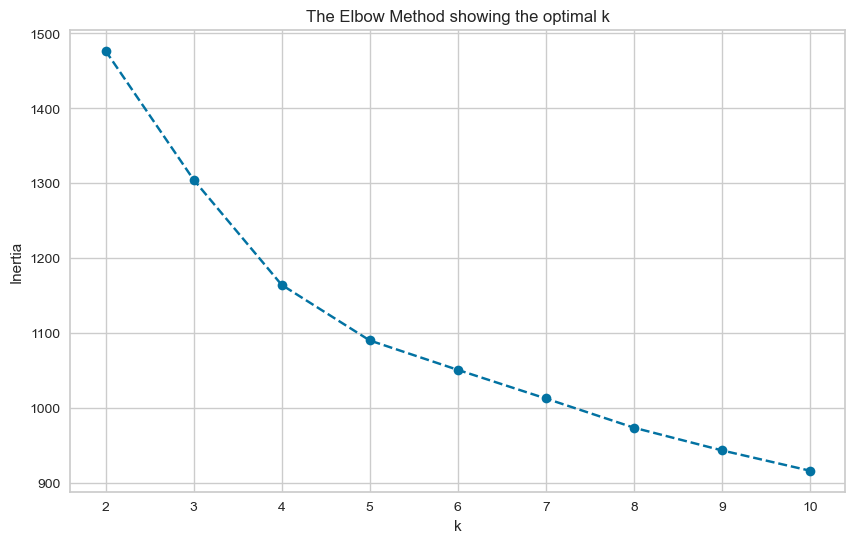

In [366]:
elbow_vis(X1_scaled_df, k_range=range(2, 11), inertia=True)

### distortion

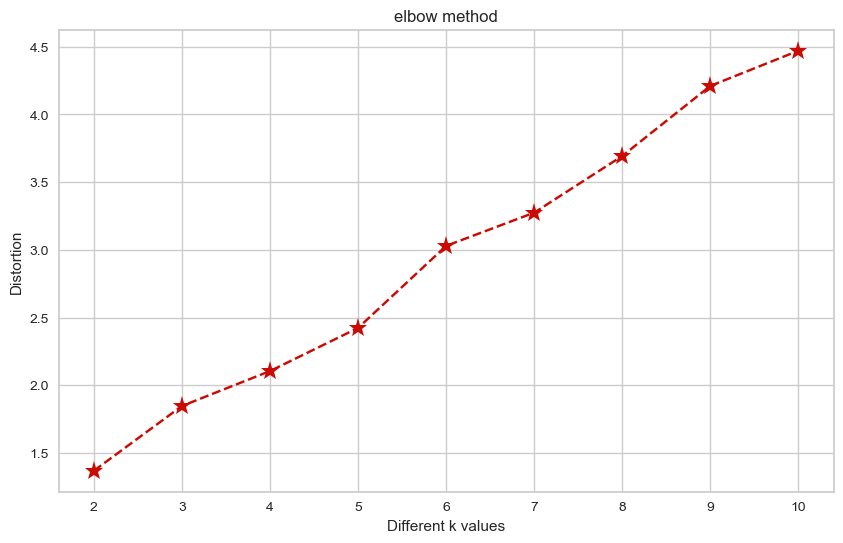

In [367]:
elbow_vis(X1_scaled_df, k_range=range(2, 11), inertia=False)

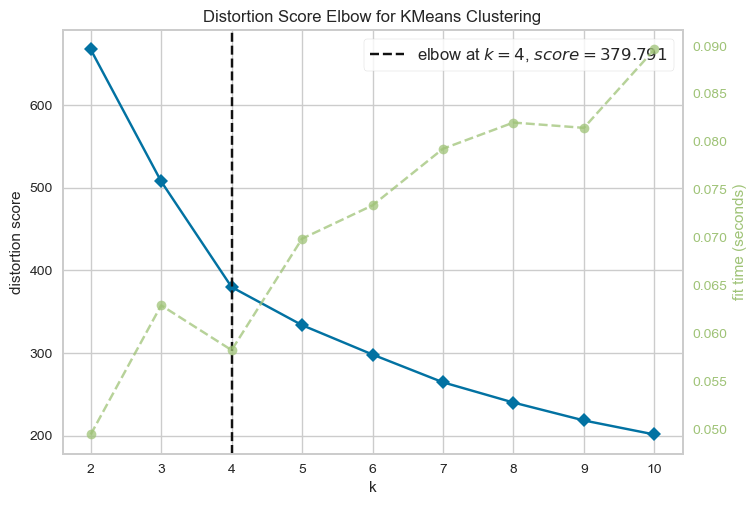

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [368]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(component_X1)
Elbow_M.show()

In [369]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(component_X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(component_X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.39973469033141673
For n_clusters=3, the silhouette score is 0.35730223552138646
For n_clusters=4, the silhouette score is 0.3755501445027024
For n_clusters=5, the silhouette score is 0.3656250378733498
For n_clusters=6, the silhouette score is 0.33418572142219277
For n_clusters=7, the silhouette score is 0.3159116136025015
For n_clusters=8, the silhouette score is 0.31494028333978547


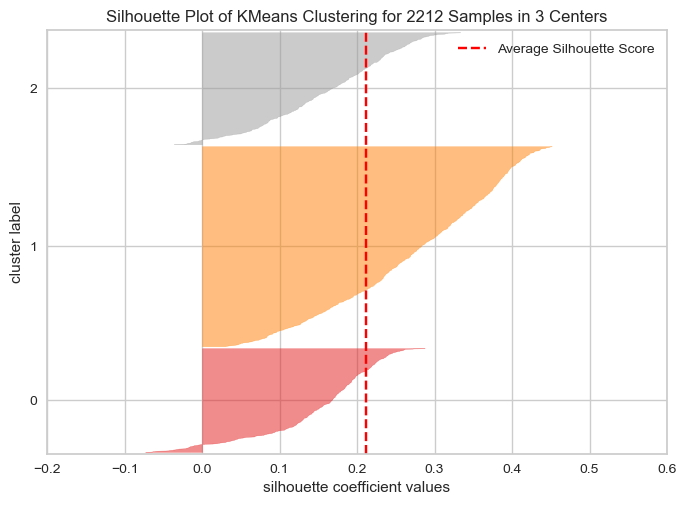

In [370]:
model3 = KMeans(n_clusters=3,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X1_scaled_df)    # Fit the data to the visualizer
visualizer.poof();   

In [371]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_X1)

KMeans(n_clusters=3, random_state=42)

In [372]:
clusters = kmeans.labels_
X1_scaled_df['cluster'] = clusters
X1_scaled_df.head()

kidhome  teenhome  recency  mnt_wines  mnt_fruits  mnt_meat_products  \
0        0         0     0.59       0.43        0.44               0.32   
1     0.50      0.50     0.38       0.01        0.01               0.00   
2        0         0     0.26       0.29        0.25               0.07   
3     0.50         0     0.26       0.01        0.02               0.01   
4     0.50         0     0.95       0.12        0.22               0.07   

   mnt_fish_products  mnt_sweet_products  mnt_gold_prods  num_deals_purchases  \
0               0.66                0.34            0.27                 0.20   
1               0.01                0.00            0.02                 0.13   
2               0.43                0.08            0.13                 0.07   
3               0.04                0.01            0.02                 0.13   
4               0.18                0.10            0.05                 0.33   

   ...  num_web_visits_month  dt_days  age  total_children  family_size  \
0  ...                  0.35     0.95 0.70               0            0   
1  ...                  0.25     0.16 0.75            0.67         0.50   
2  ...                  0.20     0.45 0.55               0         0.25   
3  ...                  0.30     0.20 0.21            0.33         0.50   
4  ...                  0.25     0.23 0.27            0.33         0.50   

   expences  purchase_type  total_cmp  income_log  cluster  
0      0.64           0.57          0        0.77        0  
1      0.01           0.14          0        0.72        1  
2      0.31           0.48          0        0.82        0  
3      0.02           0.18          0        0.60        1  
4      0.17           0.43          0        0.77        1  

[5 rows x 23 columns]

In [373]:
#df.drop('income', axis=1)

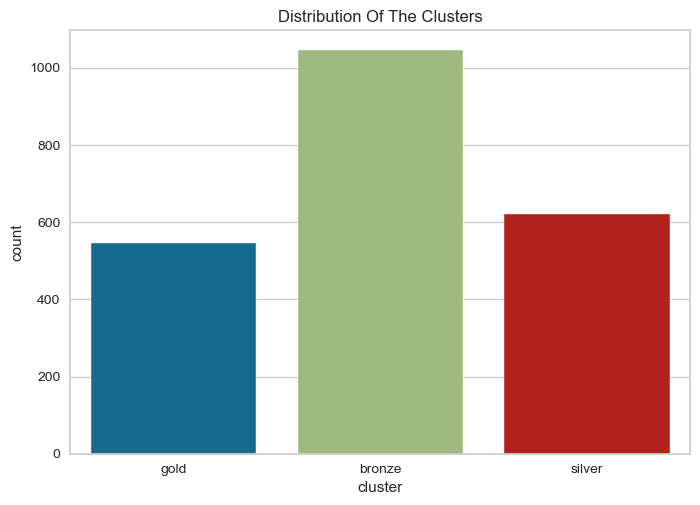

In [374]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()


In [375]:
clusters = range(3)  # 0, 1, 2

cluster_means = []

# Her küme için ortalama 'income' ve 'expences' değerlerini hesapla
for cluster in clusters:
    cluster_data = X1_scaled_df[X1_scaled_df['cluster'] == cluster][['income_log', 'expences']].mean()
    cluster_means.append({
        'cluster': cluster,
        'income_log_mean': cluster_data['income_log'],
        'expences_mean': cluster_data['expences']
    })

cluster_means_df = pd.DataFrame(cluster_means)

cluster_means_df

cluster  income_log_mean  expences_mean
0        0             0.82           0.53
1        1             0.65           0.04
2        2             0.78           0.32

#### Visualizing and Labeling All the Clusters

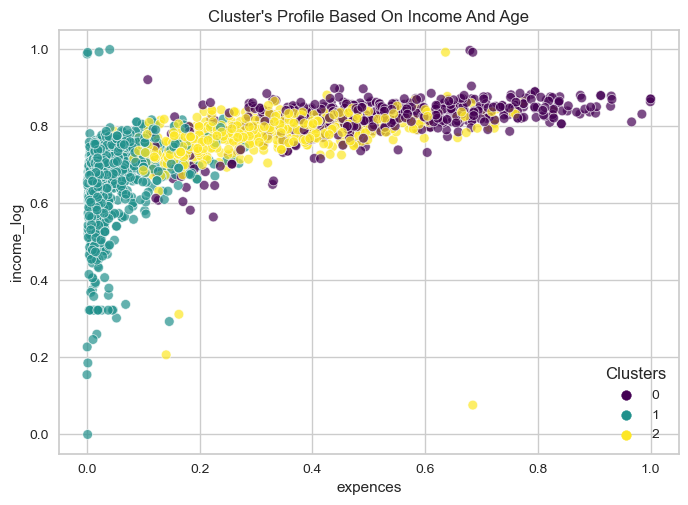

In [376]:
pal = sns.color_palette("viridis", as_cmap=True)
pl = sns.scatterplot(data=X1_scaled_df, x="expences", y="income_log", hue="cluster", alpha = 0.7, palette=pal)
pl.set_title("Cluster's Profile Based On Income And Age")
plt.legend(title='Clusters')
plt.show()

In [377]:
X1_scaled_df['cluster'].value_counts()

cluster
1    1064
2     596
0     552
Name: count, dtype: int64

**Income vs spending plot shows the clusters pattern**

0. Cluster: high spending & high income
1. Cluster: low spending & low income
2. Cluster: high spending & medium income

In [378]:
clusters_mapping = {0: 'gold',
                   1 : 'bronze',
                   2 : 'silver',
                   }

X1_scaled_df.cluster = X1_scaled_df.cluster.map(clusters_mapping)

In [379]:
cluster_profile = X1_scaled_df.groupby('cluster').mean()
print("Cluster-wise means:")
print(cluster_profile)

Cluster-wise means:
         kidhome  teenhome  recency  mnt_wines  mnt_fruits  mnt_meat_products  \
cluster                                                                         
bronze      0.41      0.23     0.50       0.03        0.03               0.02   
gold        0.02      0.01     0.49       0.40        0.32               0.26   
silver      0.07      0.52     0.50       0.33        0.15               0.09   

         mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
cluster                                                          
bronze                0.03                0.02            0.05   
gold                  0.37                0.24            0.23   
silver                0.15                0.12            0.20   

         num_deals_purchases  ...  num_store_purchases  num_web_visits_month  \
cluster                       ...                                              
bronze                  0.15  ...                 0.25                  0.33   
gol

In [380]:
cluster_profile.style.highlight_max(color='yellow', axis=0)

**With PCA-3**

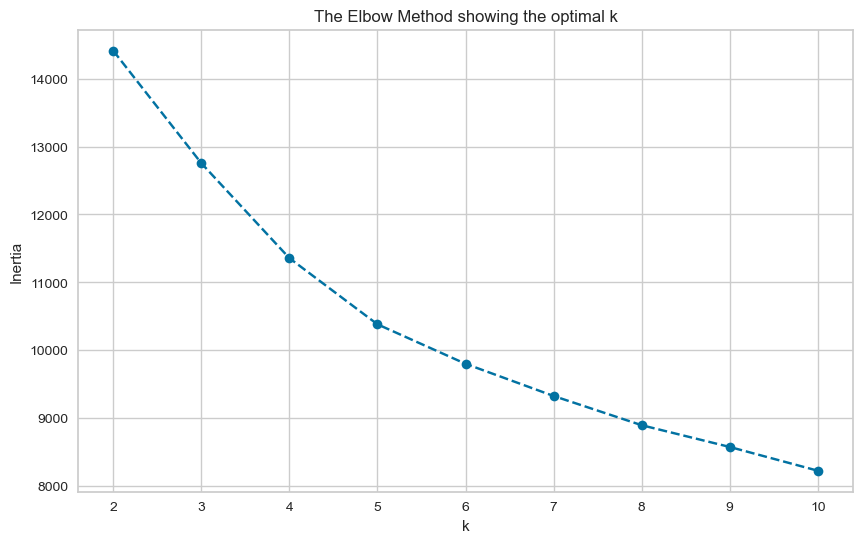

In [381]:
elbow_vis(scaled_X2, k_range=range(2, 11), inertia=True)

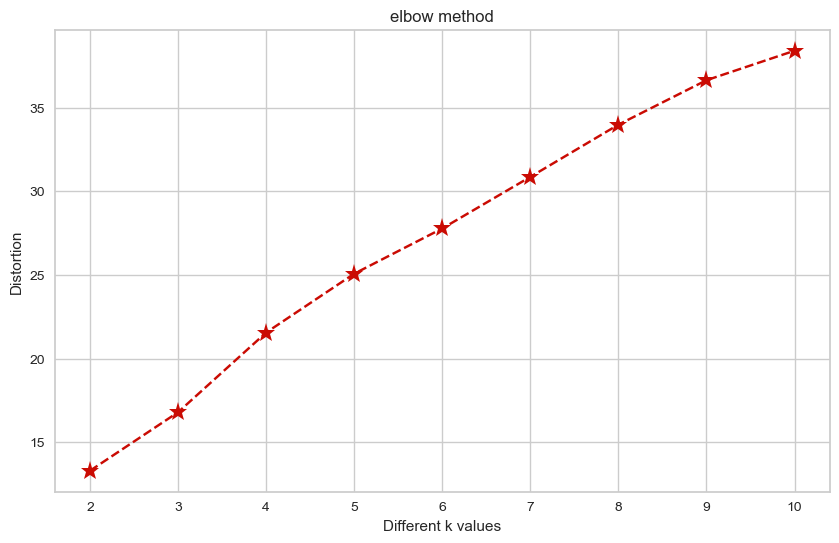

In [382]:
elbow_vis(scaled_X2, k_range=range(2, 11), inertia=False)

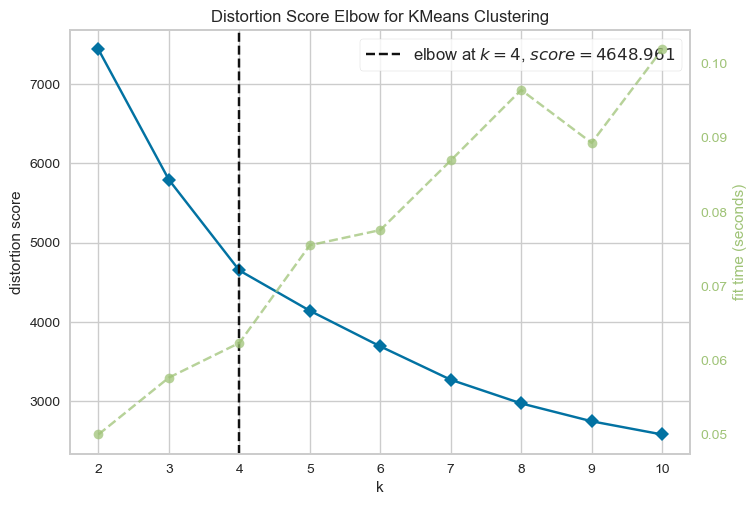

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [383]:
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(component_X2)
Elbow_M.show()

In [384]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(component_X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(component_X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.37523540040495884
For n_clusters=3, the silhouette score is 0.3291199906701064
For n_clusters=4, the silhouette score is 0.3156744938432297
For n_clusters=5, the silhouette score is 0.28865494670905817
For n_clusters=6, the silhouette score is 0.2753058239726271
For n_clusters=7, the silhouette score is 0.283380638699716
For n_clusters=8, the silhouette score is 0.2843661118714843


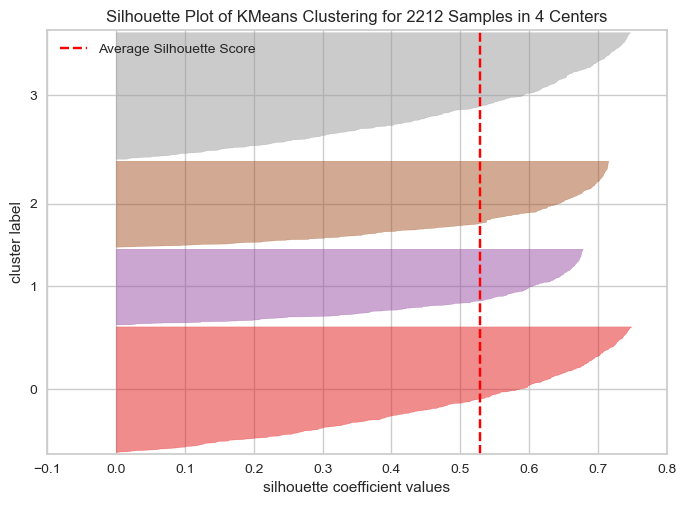

In [385]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();   

In [386]:
from sklearn.cluster import KMeans

# Optimal küme sayısını belirleme
optimal_k = 3   # 4 veya 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_X2)

# Küme etiketlerini elde etme
clusters = kmeans.labels_
df['cluster'] = clusters

df.head()

education  income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0       Graduate   58138        0         0       58        635          88   
1       Graduate   46344        1         1       38         11           1   
2       Graduate   71613        0         0       26        426          49   
3       Graduate   26646        1         0       26         11           4   
4  Post Graduate   58293        1         0       94        173          43   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  ...  complain  \
0                546                172                  88  ...         0   
1                  6                  2                   1  ...         0   
2                127                111                  21  ...         0   
3                 20                 10                   3  ...         0   
4                118                 46                  27  ...         0   

   dt_days  age  total_children  marital_status_summary  family_size  \
0      663   57               0                  single            1   
1      113   60               2                  single            3   
2      312   49               0                together            2   
3      139   30               1                together            3   
4      161   33               1                together            3   

   expences  purchase_type  total_cmp  cluster  
0      1617             25          0        0  
1        27              6          0        1  
2       776             21          0        0  
3        53              8          0        2  
4       422             19          0        2  

[5 rows x 31 columns]

#### Visualizing and Labeling All the Clusters

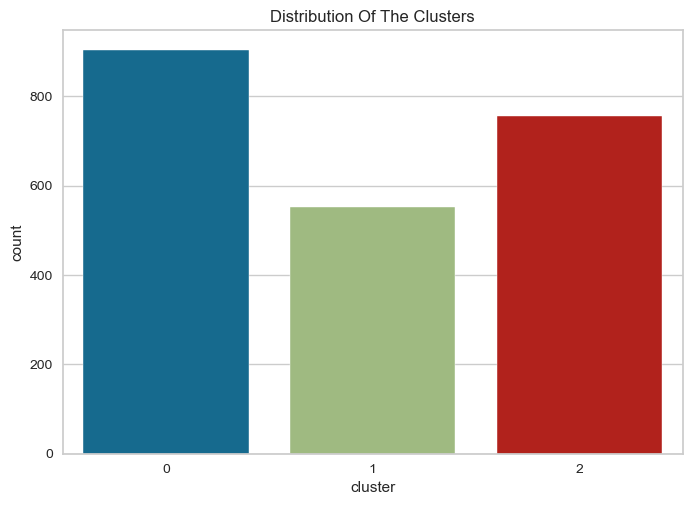

In [387]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

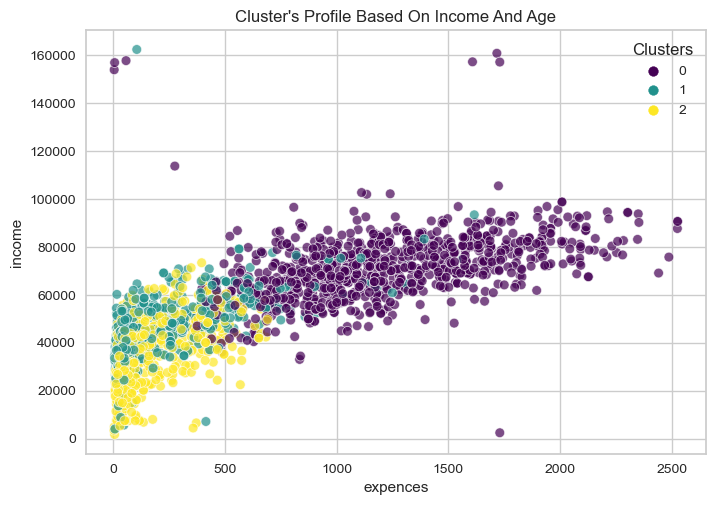

In [388]:
pal = sns.color_palette("viridis", as_cmap=True)
pl = sns.scatterplot(data=df, x="expences", y="income", hue="cluster", alpha = 0.7, palette=pal)
pl.set_title("Cluster's Profile Based On Income And Age")
plt.legend(title='Clusters')
plt.show()

In [389]:

clusters = range(3)  # 0, 1, 2

cluster_means = []

# Her küme için ortalama 'income' ve 'expences' değerlerini hesapla
for cluster in clusters:
    cluster_data = df[df['cluster'] == cluster][['income', 'expences']].mean()
    cluster_means.append({
        'cluster': cluster,
        'income_mean': cluster_data['income'],
        'expences_mean': cluster_data['expences']
    })

cluster_means_df = pd.DataFrame(cluster_means)

cluster_means_df

cluster  income_mean  expences_mean
0        0    71,278.91       1,215.31
1        1    45,908.84         247.78
2        2    33,307.47         143.95

In [390]:
df['cluster'].value_counts()

cluster
0    903
2    756
1    553
Name: count, dtype: int64

In [391]:
clusters_mapping = {0: 'gold',
                   1 : 'silver',
                   2 : 'bronze',
                   }

df.cluster = df.cluster.map(clusters_mapping)

### Clustering based on selected features

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   education               2212 non-null   object 
 1   income                  2212 non-null   float64
 2   kidhome                 2212 non-null   int64  
 3   teenhome                2212 non-null   int64  
 4   recency                 2212 non-null   int64  
 5   mnt_wines               2212 non-null   int64  
 6   mnt_fruits              2212 non-null   int64  
 7   mnt_meat_products       2212 non-null   int64  
 8   mnt_fish_products       2212 non-null   int64  
 9   mnt_sweet_products      2212 non-null   int64  
 10  mnt_gold_prods          2212 non-null   int64  
 11  num_deals_purchases     2212 non-null   int64  
 12  num_web_purchases       2212 non-null   int64  
 13  num_catalog_purchases   2212 non-null   int64  
 14  num_store_purchases     2212 non-null   int64

In [393]:
df[df['cluster'] == 0][['income', 'expences', 'total_children', 'family_size', 'total_cmp']]

Empty DataFrame
Columns: [income, expences, total_children, family_size, total_cmp]
Index: []

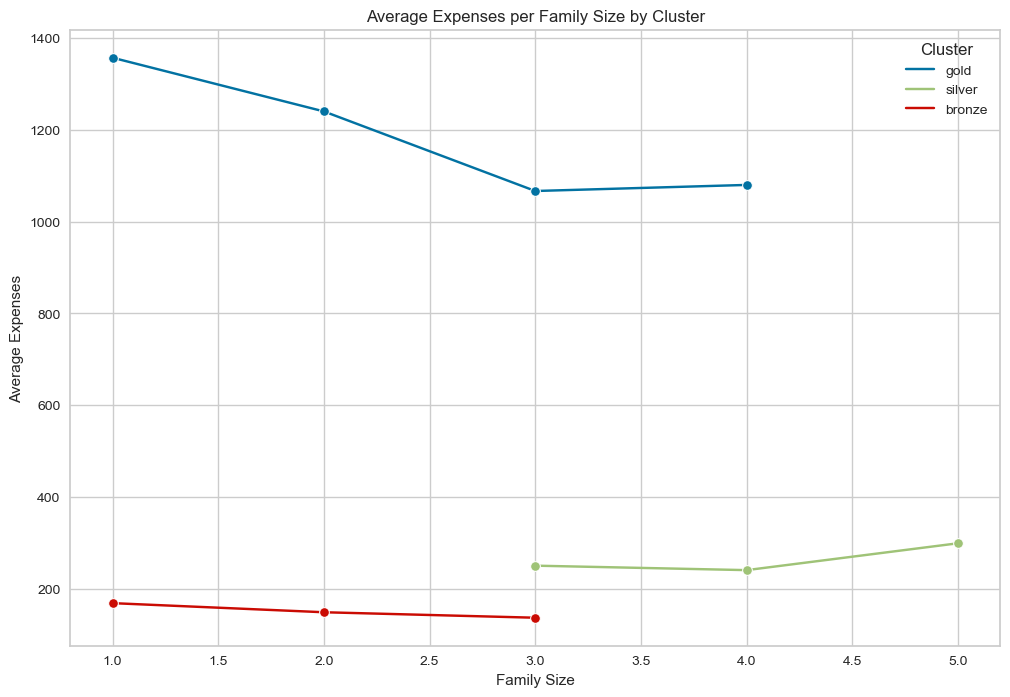

In [394]:
# Kümeleri belirle
clusters = df['cluster'].unique()

# Sonuçları saklamak için boş bir liste oluştur
cluster_family_expenses = []

# Her küme için 'family_size' sütununa göre gruplama yaparak ortalama 'expences' değerlerini hesapla
for cluster in clusters:
    cluster_data = df[df['cluster'] == cluster]
    grouped_data = cluster_data.groupby('family_size')['expences'].mean().reset_index()
    grouped_data['cluster'] = cluster
    cluster_family_expenses.append(grouped_data)

# Listeyi DataFrame'e dönüştür
cluster_family_expenses_df = pd.concat(cluster_family_expenses, ignore_index=True)

# Grafiği çiz
plt.figure(figsize=(12, 8))
sns.lineplot(data=cluster_family_expenses_df, x='family_size', y='expences', hue='cluster', marker='o')

plt.title('Average Expenses per Family Size by Cluster')
plt.xlabel('Family Size')
plt.ylabel('Average Expenses')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

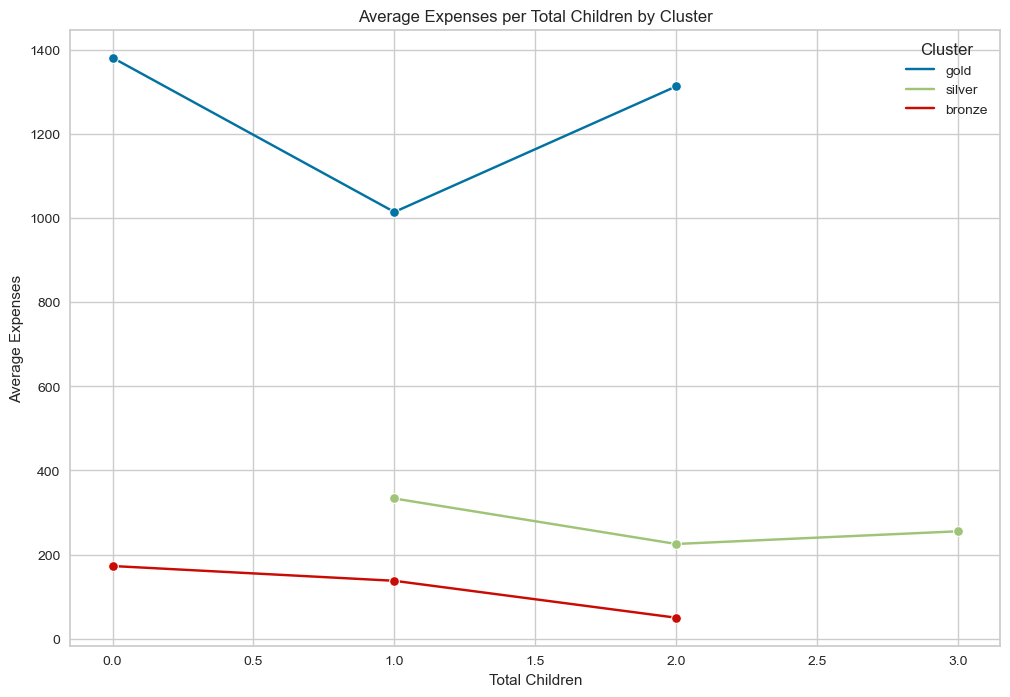

In [395]:
clusters = df['cluster'].unique()

# Sonuçları saklamak için boş bir liste oluştur
cluster_children_expenses = []

# Her küme için 'total_children' sütununa göre gruplama yaparak ortalama 'expences' değerlerini hesapla
for cluster in clusters:
    cluster_data = df[df['cluster'] == cluster]
    grouped_data = cluster_data.groupby('total_children')['expences'].mean().reset_index()
    grouped_data['cluster'] = cluster
    cluster_children_expenses.append(grouped_data)

# Listeyi DataFrame'e dönüştür
cluster_children_expenses_df = pd.concat(cluster_children_expenses, ignore_index=True)

# Grafiği çiz
plt.figure(figsize=(12, 8))
sns.lineplot(data=cluster_children_expenses_df, x='total_children', y='expences', hue='cluster', marker='o')

plt.title('Average Expenses per Total Children by Cluster')
plt.xlabel('Total Children')
plt.ylabel('Average Expenses')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

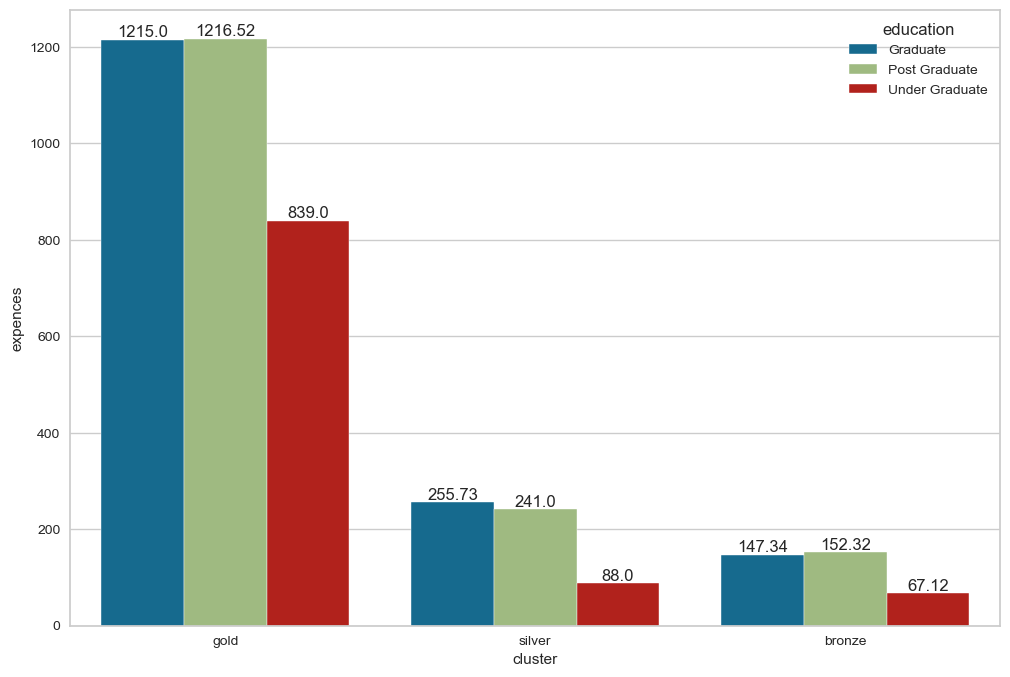

In [396]:
# Kümeleri belirle
clusters = df['cluster'].unique()

# Sonuçları saklamak için boş bir liste oluştur
cluster_family_spent = []

# Her küme için 'education' sütununa göre gruplama yaparak ortalama 'spent' değerlerini hesapla
for cluster in clusters:
    cluster_data = df[df['cluster'] == cluster]
    grouped_data = cluster_data.groupby('education')['expences'].mean().reset_index()
    grouped_data['cluster'] = cluster
    cluster_family_spent.append(grouped_data)

# Listeyi DataFrame'e dönüştür
cluster_family_spent_df = pd.concat(cluster_family_spent, ignore_index=True)

# Grafiği çiz
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=cluster_family_spent_df, x='cluster', y='expences', hue='education')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if not pd.isna(height):  # NaN kontrolü
            height = round(height, 2)  # Yüksekliği yuvarlama
            ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()

#### Select features from existing data

In [397]:
df1 = df[['income', 'total_cmp', 'expences', 'purchase_type', 'dt_days']]

In [398]:
df.columns

Index(['education', 'income', 'kidhome', 'teenhome', 'recency', 'mnt_wines',
       'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products',
       'mnt_sweet_products', 'mnt_gold_prods', 'num_deals_purchases',
       'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
       'num_web_visits_month', 'accepted_cmp_3', 'accepted_cmp_4',
       'accepted_cmp_5', 'accepted_cmp_1', 'accepted_cmp_2', 'complain',
       'dt_days', 'age', 'total_children', 'marital_status_summary',
       'family_size', 'expences', 'purchase_type', 'total_cmp', 'cluster'],
      dtype='object')

In [399]:
df1.head()

income  total_cmp  expences  purchase_type  dt_days
0   58138          0      1617             25      663
1   46344          0        27              6      113
2   71613          0       776             21      312
3   26646          0        53              8      139
4   58293          0       422             19      161

In [400]:
scaler = StandardScaler()

In [401]:
scaled_df1 = scaler.fit_transform(df1)
scaled_df1

array([[ 0.28710487, -0.43915996,  1.67624537,  1.31794493,  1.5277208 ],
       [-0.26088203, -0.43915996, -0.96329696, -1.15927285, -1.18901134],
       [ 0.9131964 , -0.43915996,  0.28011009,  0.7964254 , -0.20604826],
       ...,
       [ 0.23334696,  1.0326913 ,  1.05205171,  0.53566563, -0.98155179],
       [ 0.80317156, -0.43915996,  0.39133608,  1.05718517, -0.97661228],
       [ 0.04229031, -0.43915996, -0.72258398, -0.50737343,  1.32520077]])

In [402]:
scaled_X1 = pd.DataFrame(scaled_df1, columns = df1.columns)
scaled_X1.head()

income  total_cmp  expences  purchase_type  dt_days
0    0.29      -0.44      1.68           1.32     1.53
1   -0.26      -0.44     -0.96          -1.16    -1.19
2    0.91      -0.44      0.28           0.80    -0.21
3   -1.18      -0.44     -0.92          -0.90    -1.06
4    0.29      -0.44     -0.31           0.54    -0.95

In [403]:
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [404]:
hopkins(scaled_X1, 0.05)

0.8813574718039132

#### Determine optimal number of clusters for selected features

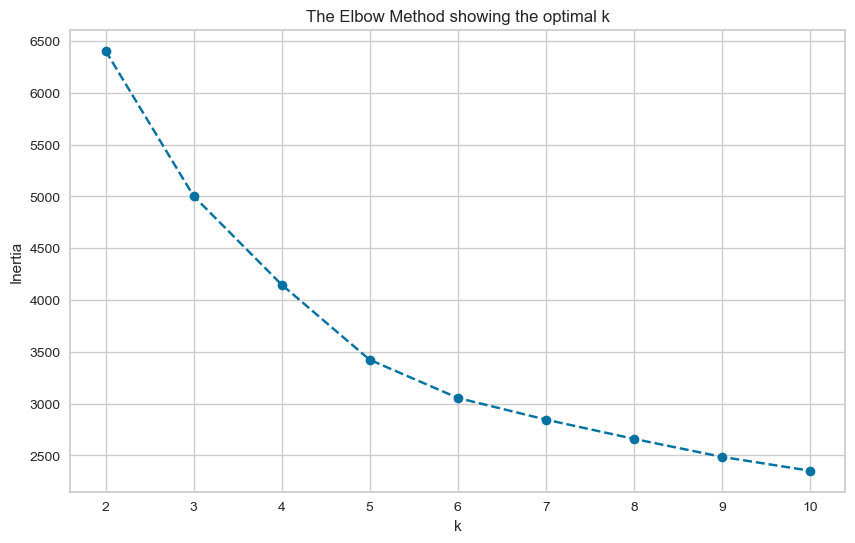

In [405]:
elbow_vis(scaled_X1)

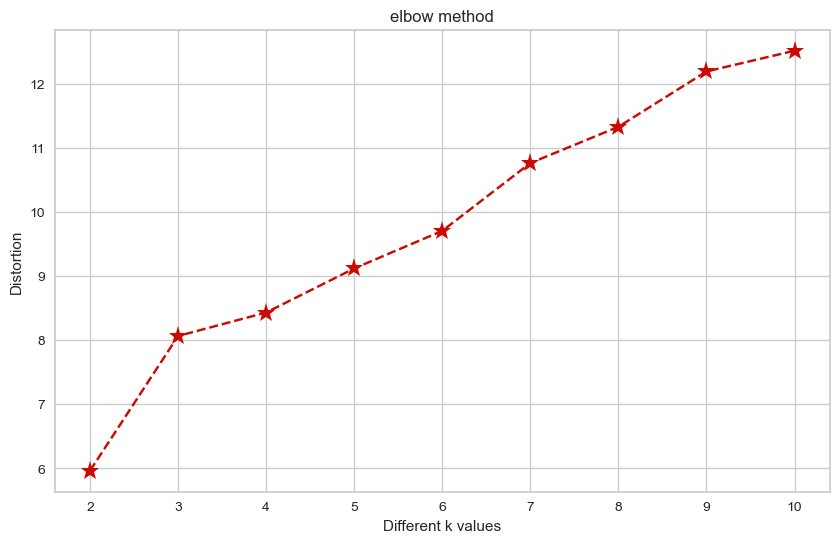

In [406]:
elbow_vis(scaled_X1, inertia = False)

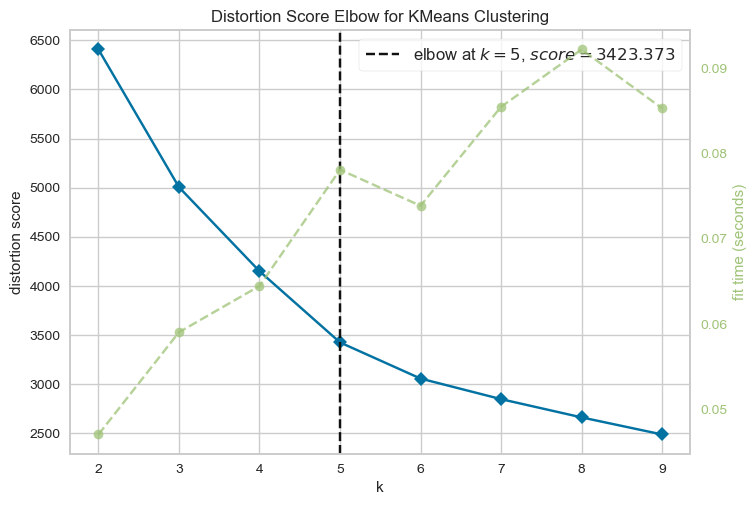

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [407]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(scaled_X1)
visu.poof()

In [408]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(scaled_X1)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.38754302073246916
For n_clusters=3, the silhouette score is 0.36546352370622226
For n_clusters=4, the silhouette score is 0.3083344660754144
For n_clusters=5, the silhouette score is 0.3070324849332791
For n_clusters=6, the silhouette score is 0.2985572232621224
For n_clusters=7, the silhouette score is 0.2945326491289126
For n_clusters=8, the silhouette score is 0.27618086486083887
For n_clusters=9, the silhouette score is 0.28121268329406424


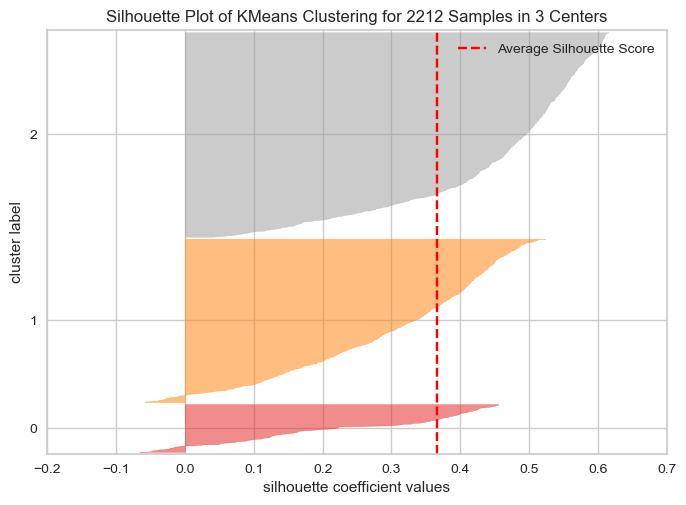

In [409]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3,
                random_state=42)          # we decided n_clusters=5!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(scaled_X1)    # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

#### Building the model based on the optimal number of clusters with selected features

In [410]:
K_means_model = KMeans(n_clusters = 3, random_state=42)
K_means_model.fit_predict(scaled_X1)

array([1, 2, 1, ..., 1, 1, 2])

In [411]:
K_means_model.labels_

array([1, 2, 1, ..., 1, 1, 2])

In [412]:
clusters = K_means_model.labels_

In [413]:
df1['cluster'] = clusters

In [414]:
df1

income  total_cmp  expences  purchase_type  dt_days  cluster
0      58138          0      1617             25      663        1
1      46344          0        27              6      113        2
2      71613          0       776             21      312        1
3      26646          0        53              8      139        2
4      58293          0       422             19      161        1
...      ...        ...       ...            ...      ...      ...
2235   61223          0      1341             18      381        1
2236   64014          1       444             22       19        1
2237   56981          1      1241             19      155        1
2238   69245          0       843             23      156        1
2239   52869          0       172             11      622        2

[2212 rows x 6 columns]

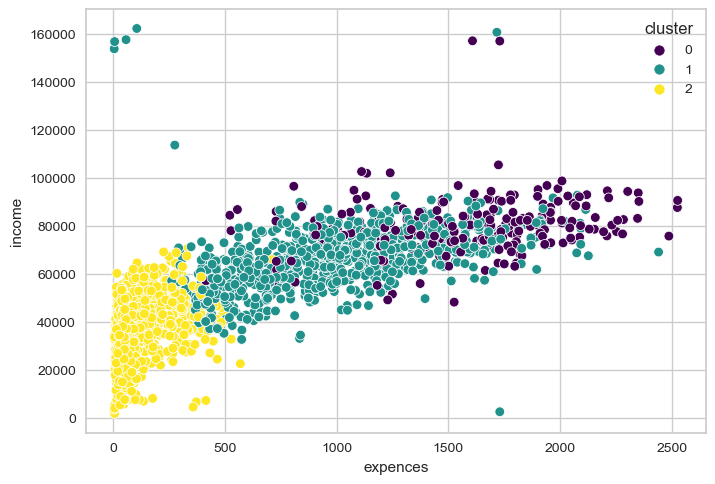

In [415]:
sns.scatterplot(data=df1, x="expences", y="income", hue="cluster", palette = 'viridis');

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.

In [416]:
df.columns

Index(['education', 'income', 'kidhome', 'teenhome', 'recency', 'mnt_wines',
       'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products',
       'mnt_sweet_products', 'mnt_gold_prods', 'num_deals_purchases',
       'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
       'num_web_visits_month', 'accepted_cmp_3', 'accepted_cmp_4',
       'accepted_cmp_5', 'accepted_cmp_1', 'accepted_cmp_2', 'complain',
       'dt_days', 'age', 'total_children', 'marital_status_summary',
       'family_size', 'expences', 'purchase_type', 'total_cmp', 'cluster'],
      dtype='object')

In [417]:
df2 = df[['income', 'total_cmp', 'expences', 'dt_days']]
df2

income  total_cmp  expences  dt_days
0      58138          0      1617      663
1      46344          0        27      113
2      71613          0       776      312
3      26646          0        53      139
4      58293          0       422      161
...      ...        ...       ...      ...
2235   61223          0      1341      381
2236   64014          1       444       19
2237   56981          1      1241      155
2238   69245          0       843      156
2239   52869          0       172      622

[2212 rows x 4 columns]

In [418]:
scaler = StandardScaler()

In [419]:

scaled_df2 = scaler.fit_transform(df2)
scaled_df2

array([[ 0.28710487, -0.43915996,  1.67624537,  1.5277208 ],
       [-0.26088203, -0.43915996, -0.96329696, -1.18901134],
       [ 0.9131964 , -0.43915996,  0.28011009, -0.20604826],
       ...,
       [ 0.23334696,  1.0326913 ,  1.05205171, -0.98155179],
       [ 0.80317156, -0.43915996,  0.39133608, -0.97661228],
       [ 0.04229031, -0.43915996, -0.72258398,  1.32520077]])

In [420]:


scaled_X2 = pd.DataFrame(scaled_df2, columns = df2.columns)
scaled_X2.head()


income  total_cmp  expences  dt_days
0    0.29      -0.44      1.68     1.53
1   -0.26      -0.44     -0.96    -1.19
2    0.91      -0.44      0.28    -0.21
3   -1.18      -0.44     -0.92    -1.06
4    0.29      -0.44     -0.31    -0.95

In [421]:
hopkins(scaled_X2, 0.05)

0.9109198951998165

In [422]:
hopkins(scaled_X2, 1)

0.9130428676858577

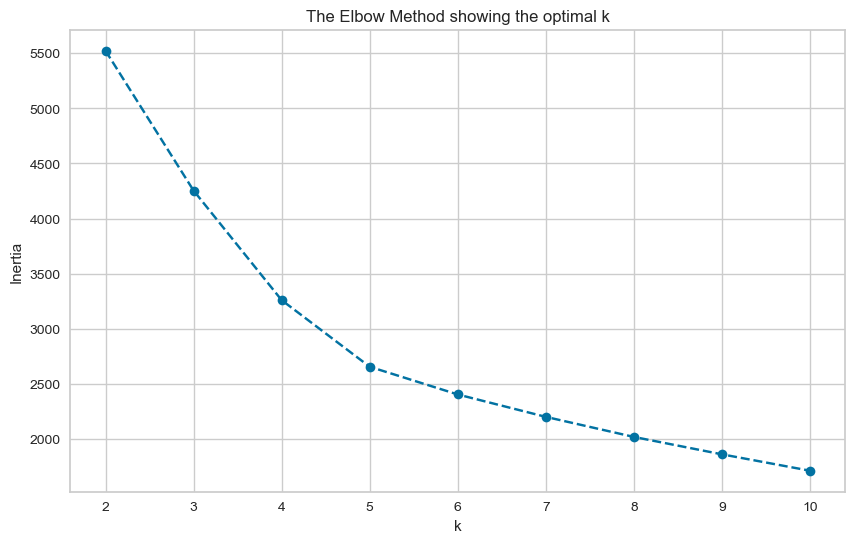

In [423]:
elbow_vis(scaled_X2)

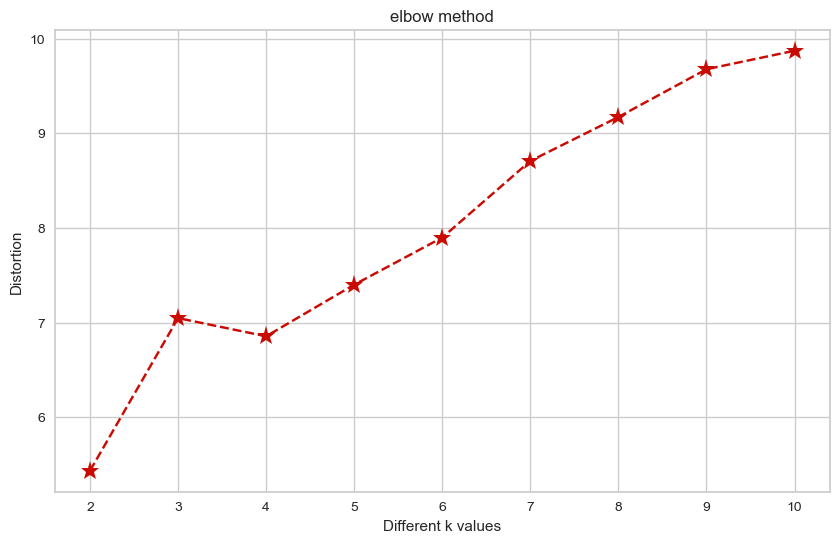

In [424]:
elbow_vis(scaled_X2, inertia = False)

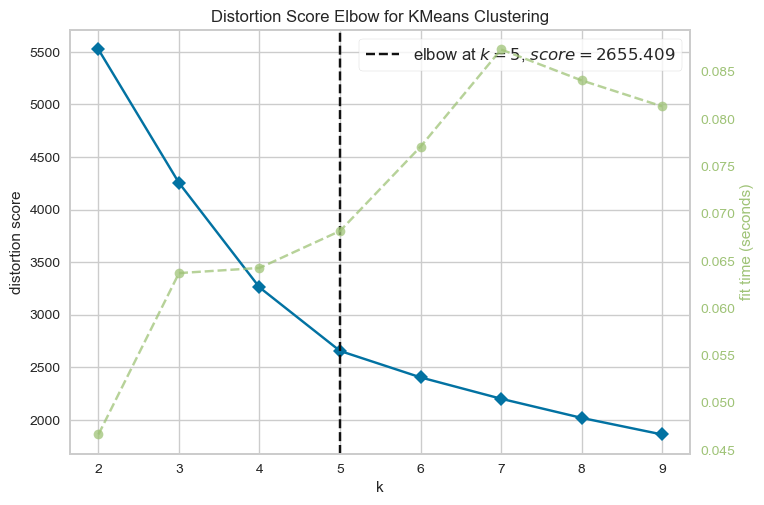

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [425]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(scaled_X2)
visu.poof()

In [426]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(scaled_X2)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3693543639301231
For n_clusters=3, the silhouette score is 0.34364222792977656
For n_clusters=4, the silhouette score is 0.3269059173482028
For n_clusters=5, the silhouette score is 0.3370251089401989
For n_clusters=6, the silhouette score is 0.3138181958895327
For n_clusters=7, the silhouette score is 0.31363935225269574
For n_clusters=8, the silhouette score is 0.322902588779869
For n_clusters=9, the silhouette score is 0.33031359763852985


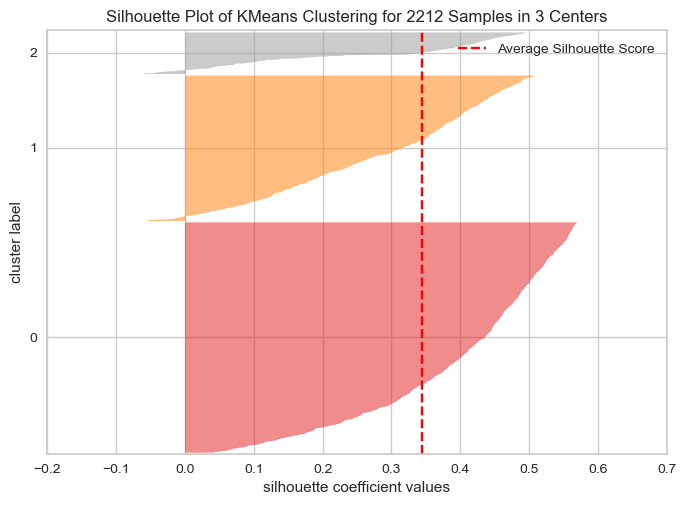

In [427]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3,
                random_state=42)          # we decided n_clusters=4!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(scaled_X2)    # Fit the data to the visualizer
visualizer.poof();

In [428]:
K_means_model = KMeans(n_clusters = 3, random_state=42)
K_means_model.fit_predict(scaled_X2)

K_means_model.labels_

clusters2 = K_means_model.labels_

df['cluster'] = clusters2

df

education  income  kidhome  teenhome  recency  mnt_wines  \
0          Graduate   58138        0         0       58        635   
1          Graduate   46344        1         1       38         11   
2          Graduate   71613        0         0       26        426   
3          Graduate   26646        1         0       26         11   
4     Post Graduate   58293        1         0       94        173   
...             ...     ...      ...       ...      ...        ...   
2235       Graduate   61223        0         1       46        709   
2236  Post Graduate   64014        2         1       56        406   
2237       Graduate   56981        0         0       91        908   
2238  Post Graduate   69245        0         1        8        428   
2239  Post Graduate   52869        1         1       40         84   

      mnt_fruits  mnt_meat_products  mnt_fish_products  mnt_sweet_products  \
0             88                546                172                  88   
1              1                  6                  2                   1   
2             49                127                111                  21   
3              4                 20                 10                   3   
4             43                118                 46                  27   
...          ...                ...                ...                 ...   
2235          43                182                 42                 118   
2236           0                 30                  0                   0   
2237          48                217                 32                  12   
2238          30                214                 80                  30   
2239           3                 61                  2                   1   

      ...  complain  dt_days  age  total_children  marital_status_summary  \
0     ...         0      663   57               0                  single   
1     ...         0      113   60               2                  single   
2     ...         0      312   49               0                together   
3     ...         0      139   30               1                together   
4     ...         0      161   33               1                together   
...   ...       ...      ...  ...             ...                     ...   
2235  ...         0      381   47               1                together   
2236  ...         0       19   68               3                together   
2237  ...         0      155   33               0                  single   
2238  ...         0      156   58               1                together   
2239  ...         0      622   60               2                together   

      family_size  expences  purchase_type  total_cmp  cluster  
0               1      1617             25          0        1  
1               3        27              6          0        0  
2               2       776             21          0        1  
3               3        53              8          0        0  
4               3       422             19          0        0  
...           ...       ...            ...        ...      ...  
2235            3      1341             18          0        1  
2236            5       444             22          1        1  
2237            1      1241             19          1        1  
2238            3       843             23          0        1  
2239            4       172             11          0        0  

[2212 rows x 31 columns]

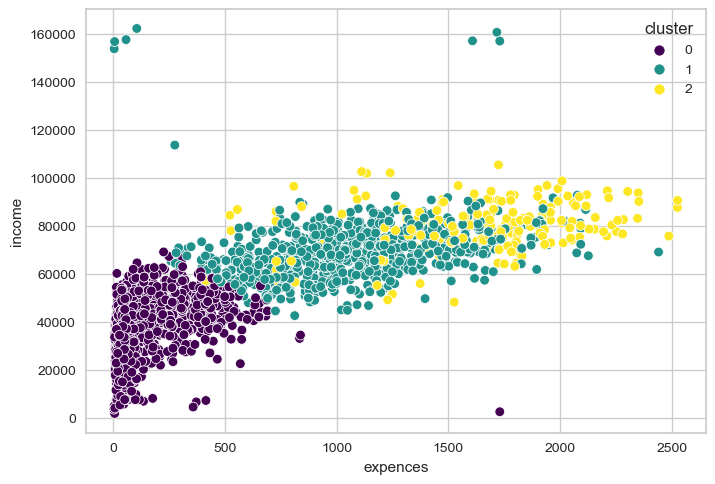

In [429]:
sns.scatterplot(data=df, x="expences", y="income", hue="cluster", palette = 'viridis');

In [430]:
clusters_mapping = {0: 'bronze',
                   1 : 'silver',
                   2 : 'gold',
                   }

df.cluster = df.cluster.map(clusters_mapping)

In [431]:
df.cluster

0       silver
1       bronze
2       silver
3       bronze
4       bronze
         ...  
2235    silver
2236    silver
2237    silver
2238    silver
2239    bronze
Name: cluster, Length: 2212, dtype: object

In [432]:
df[['income', 'expences', 'cluster', 'total_cmp']][['income']].mean()

income   51,958.81
dtype: float64

In [433]:
cluster_names = ['silver', 'gold', 'bronze']

cluster_means = []

# Her küme için ortalama 'income' ve 'spent' değerlerini hesapla
for cluster in cluster_names:
    cluster_data = df[df['cluster'] == cluster][['income', 'expences']].mean()
    cluster_means.append({
        'cluster': cluster,
        'income_mean': cluster_data['income'],
        'spent_mean': cluster_data['expences']
    })

cluster_means_df = pd.DataFrame(cluster_means)

cluster_means_df.sort_values(by = 'income_mean')


cluster  income_mean  spent_mean
2  bronze    36,387.97      153.16
0  silver    68,703.53    1,037.51
1    gold    79,892.08    1,626.44

In [434]:
df.groupby('cluster')['total_cmp'].mean()

cluster
bronze   0.09
gold     1.91
silver   0.17
Name: total_cmp, dtype: float64

In [435]:
df.groupby('cluster')['total_cmp'].sum()

cluster
bronze    114
gold      418
silver    128
Name: total_cmp, dtype: int64

In [436]:
df.groupby(['cluster', 'total_cmp'])[['total_cmp']].mean()

total_cmp
cluster total_cmp           
bronze  0                  0
        1                  1
        2                  2
gold    1                  1
        2                  2
        3                  3
        4                  4
silver  0                  0
        1                  1

## Hierarchical Clustering

In [437]:
df3 = X_num.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income                 2212 non-null   float64
 1   kidhome                2212 non-null   int64  
 2   teenhome               2212 non-null   int64  
 3   recency                2212 non-null   int64  
 4   mnt_wines              2212 non-null   int64  
 5   mnt_fruits             2212 non-null   int64  
 6   mnt_meat_products      2212 non-null   int64  
 7   mnt_fish_products      2212 non-null   int64  
 8   mnt_sweet_products     2212 non-null   int64  
 9   mnt_gold_prods         2212 non-null   int64  
 10  num_deals_purchases    2212 non-null   int64  
 11  num_web_purchases      2212 non-null   int64  
 12  num_catalog_purchases  2212 non-null   int64  
 13  num_store_purchases    2212 non-null   int64  
 14  num_web_visits_month   2212 non-null   int64  
 15  dt_days  

In [438]:
hopkins(df3, 1)

0.9441314425844277

In [439]:
result=[]
for _ in range(10):
    result.append(hopkins(df3, 1))
np.mean(result)

0.9446432027751586

In [440]:
df_min_max = df3.copy() 
df_std = df3.copy()

In [441]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(df_min_max), 1))
np.mean(result)

0.8257322412242536

In [442]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(df_std), 1))
np.mean(result)

0.8466776186004829

In [443]:
scaler = StandardScaler()
# According to minmaxscaler and standardscaler, I prefered to scale the data with standard scaling

In [444]:
df3_scaled = scaler.fit_transform(df3)

In [445]:
X_hm = pd.DataFrame(df3_scaled, columns=df3.columns)
X_hm.head()

income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0    0.29    -0.82     -0.93     0.31       0.98        1.55   
1   -0.26     1.04      0.91    -0.38      -0.87       -0.64   
2    0.91    -0.82     -0.93    -0.80       0.36        0.57   
3   -1.18     1.04     -0.93    -0.80      -0.87       -0.56   
4    0.29     1.04     -0.93     1.55      -0.39        0.42   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0               1.69               2.45                1.48            0.85   
1              -0.72              -0.65               -0.63           -0.73   
2              -0.18               1.34               -0.15           -0.04   
3              -0.66              -0.50               -0.59           -0.75   
4              -0.22               0.15               -0.00           -0.56   

   ...  num_catalog_purchases  num_store_purchases  num_web_visits_month  \
0  ...                   2.50                -0.56                  0.69   
1  ...                  -0.57                -1.17                 -0.13   
2  ...                  -0.23                 1.29                 -0.54   
3  ...                  -0.91                -0.56                  0.28   
4  ...                   0.11                 0.06                 -0.13   

   dt_days   age  total_children  family_size  expences  purchase_type  \
0     1.53  1.02           -1.26        -1.76      1.68           1.32   
1    -1.19  1.27            1.40         0.45     -0.96          -1.16   
2    -0.21  0.33           -1.26        -0.65      0.28           0.80   
3    -1.06 -1.29            0.07         0.45     -0.92          -0.90   
4    -0.95 -1.03            0.07         0.45     -0.31           0.54   

   total_cmp  
0      -0.44  
1      -0.44  
2      -0.44  
3      -0.44  
4      -0.44  

[5 rows x 22 columns]

In [446]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Determine optimal number of clusters using Dendogram

In [447]:
hc_ward = linkage(y=X_hm, method="ward")
hc_complete = linkage(X_hm, "complete")
hc_average = linkage(X_hm, "average")
hc_single = linkage(X_hm, "single")

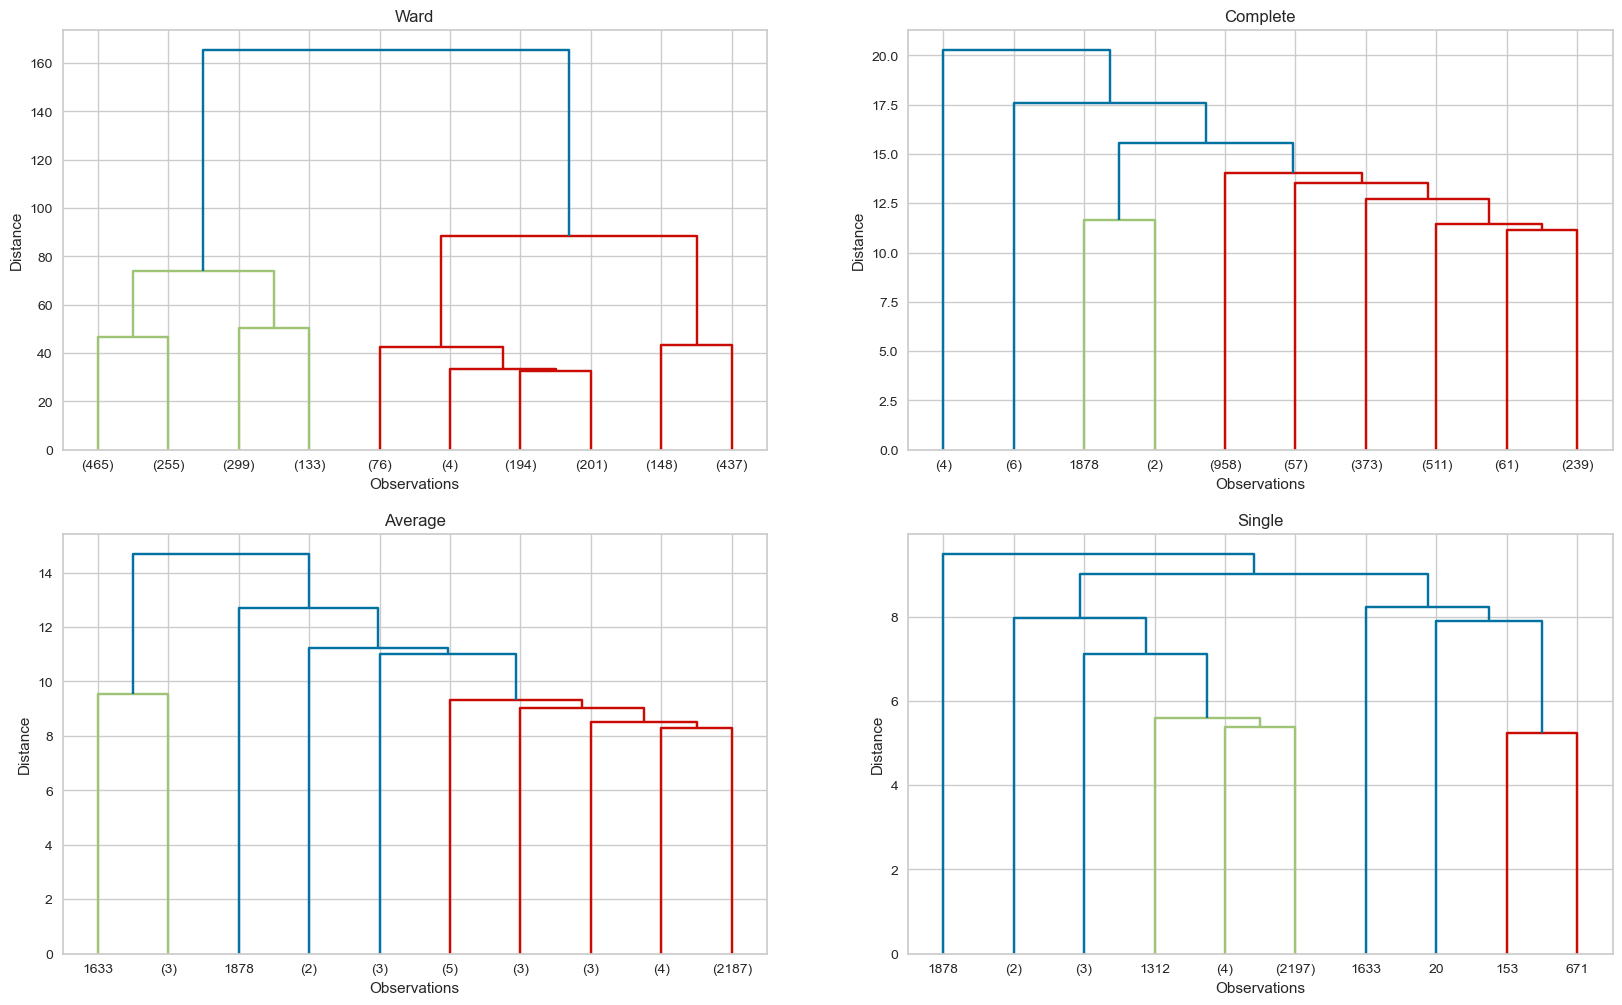

In [448]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

### silhouette_score

In [449]:
from sklearn.metrics import silhouette_score

In [450]:
from sklearn.cluster import AgglomerativeClustering

In [451]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X_hm)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_hm, model.labels_)}')

Silhouette Score for 2 clusters: 0.25949005639423484
Silhouette Score for 3 clusters: 0.21023596369056965
Silhouette Score for 4 clusters: 0.16101528890871689
Silhouette Score for 5 clusters: 0.13838010599342632
Silhouette Score for 6 clusters: 0.14198455396188372
Silhouette Score for 7 clusters: 0.13563143996224522
Silhouette Score for 8 clusters: 0.1374860829587366
Silhouette Score for 9 clusters: 0.1399707355298758


In [452]:
model = AgglomerativeClustering(n_clusters=3,
                                affinity="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X_hm)

In [453]:
df3["clusters"] = clusters
df3.head()

income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0   58138        0         0       58        635          88   
1   46344        1         1       38         11           1   
2   71613        0         0       26        426          49   
3   26646        1         0       26         11           4   
4   58293        1         0       94        173          43   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0                546                172                  88              88   
1                  6                  2                   1               6   
2                127                111                  21              42   
3                 20                 10                   3               5   
4                118                 46                  27              15   

   ...  num_store_purchases  num_web_visits_month  dt_days  age  \
0  ...                    4                     7      663   57   
1  ...                    2                     5      113   60   
2  ...                   10                     4      312   49   
3  ...                    4                     6      139   30   
4  ...                    6                     5      161   33   

   total_children  family_size  expences  purchase_type  total_cmp  clusters  
0               0            1      1617             25          0         1  
1               2            3        27              6          0         0  
2               0            2       776             21          0         1  
3               1            3        53              8          0         0  
4               1            3       422             19          0         0  

[5 rows x 23 columns]

In [454]:

# Hiyerarşik kümeleme modeli oluşturma
model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
clusters = model.fit_predict(X_hm)

# Küme etiketlerini veri setine ekleme
df3['clusters'] = clusters

# Sonucu kontrol etme
print(df3.head())

# 3D scatter plot oluşturma
fig = px.scatter_3d(df3, x='income', y='expences', z='total_cmp', color='clusters')
fig.update_coloraxes(showscale=False)
fig.show()

   income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0   58138        0         0       58        635          88   
1   46344        1         1       38         11           1   
2   71613        0         0       26        426          49   
3   26646        1         0       26         11           4   
4   58293        1         0       94        173          43   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0                546                172                  88              88   
1                  6                  2                   1               6   
2                127                111                  21              42   
3                 20                 10                   3               5   
4                118                 46                  27              15   

   ...  num_store_purchases  num_web_visits_month  dt_days  age  \
0  ...                    4                     7      663   57   
1  ...

In [455]:
cluster_profile = df3.groupby('clusters').mean()
print("Cluster-wise means:")
print(cluster_profile)

Cluster-wise means:
            income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
clusters                                                                
0        37,163.79     0.81      0.49    49.50      76.90        6.41   
1        60,500.98     0.05      0.93    47.35     484.53       35.61   
2        77,320.28     0.03      0.03    49.91     638.44       63.21   

          mnt_meat_products  mnt_fish_products  mnt_sweet_products  \
clusters                                                             
0                     35.42               9.43                6.84   
1                    166.88              49.03               36.75   
2                    486.40              92.07               64.10   

          mnt_gold_prods  ...  num_catalog_purchases  num_store_purchases  \
clusters                  ...                                               
0                  20.26  ...                   0.74                 3.63   
1                  65.73  ...   

In [456]:
cluster_profile.style.highlight_max(color='yellow', axis=0)

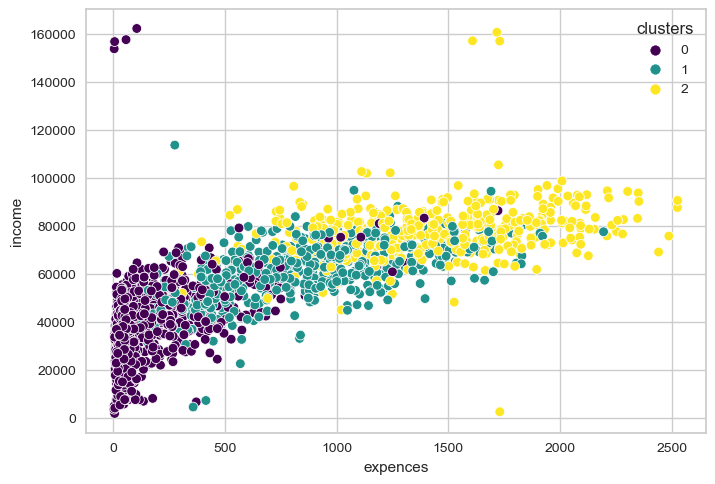

In [457]:
sns.scatterplot(data=df3, x="expences", y="income", hue="clusters", palette = 'viridis');

### Clustering based on selected features

In [458]:
X_num.columns

Index(['income', 'kidhome', 'teenhome', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'dt_days', 'age', 'total_children', 'family_size', 'expences',
       'purchase_type', 'total_cmp'],
      dtype='object')

In [459]:
df_new = X_num[['income', 'expences', 'total_cmp', 'family_size', 'purchase_type']]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   income         2212 non-null   float64
 1   expences       2212 non-null   int64  
 2   total_cmp      2212 non-null   int64  
 3   family_size    2212 non-null   int64  
 4   purchase_type  2212 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 103.7 KB


In [460]:
hopkins(df_new, 1)

0.9691593821810945

In [461]:
result=[]
for _ in range(10):
    result.append(hopkins(df_new, 1))
np.mean(result)

0.9706271635502335

In [462]:
df4 = df_new.copy() 
df5 = df_new.copy()

In [463]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(df4), 1))
np.mean(result)

0.9302594603885586

In [464]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(df5), 1))
np.mean(result)

0.9312838219045727

In [465]:
scaler = MinMaxScaler()


In [466]:
df_new_scaled = scaler.fit_transform(df_new)

In [467]:
X_hmodel = pd.DataFrame(df_new_scaled, columns=df_new.columns)
X_hmodel.head()

income  expences  total_cmp  family_size  purchase_type
0    0.35      0.64          0            0           0.57
1    0.28      0.01          0         0.50           0.14
2    0.43      0.31          0         0.25           0.48
3    0.16      0.02          0         0.50           0.18
4    0.35      0.17          0         0.50           0.43

### Determine optimal number of clusters using Dendogram

In [468]:
hc_ward = linkage(y=X_hmodel, method="ward")
hc_complete = linkage(X_hmodel, "complete")
hc_average = linkage(X_hmodel, "average")
hc_single = linkage(X_hmodel, "single")

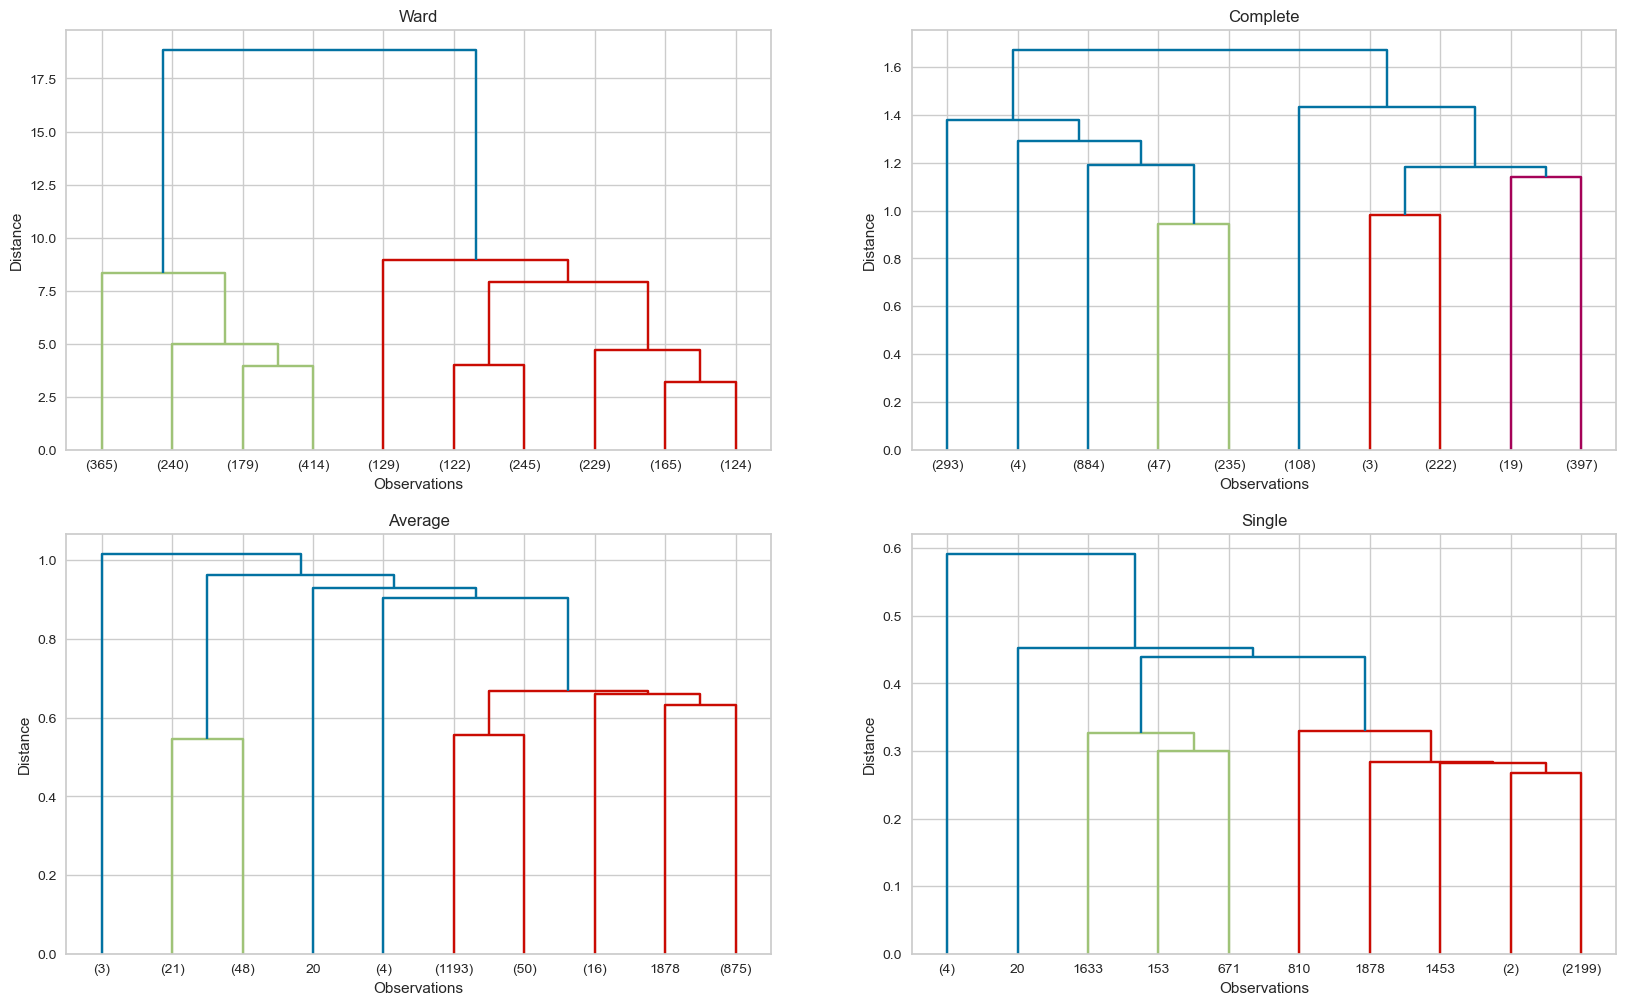

In [469]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

### silhouette_score

In [470]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X_hmodel)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_hmodel, model.labels_)}')

Silhouette Score for 2 clusters: 0.39729480687972235
Silhouette Score for 3 clusters: 0.38190458413730916
Silhouette Score for 4 clusters: 0.32414905090665824
Silhouette Score for 5 clusters: 0.32294654809104223
Silhouette Score for 6 clusters: 0.32347030745648275
Silhouette Score for 7 clusters: 0.31228916243592897
Silhouette Score for 8 clusters: 0.3207207441060531
Silhouette Score for 9 clusters: 0.30759812177836887


In [471]:
model = AgglomerativeClustering(n_clusters=3,
                                affinity="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X_hmodel)

In [472]:
X_hmodel["clusters"] = clusters
X_hmodel.head()

income  expences  total_cmp  family_size  purchase_type  clusters
0    0.35      0.64          0            0           0.57         1
1    0.28      0.01          0         0.50           0.14         0
2    0.43      0.31          0         0.25           0.48         1
3    0.16      0.02          0         0.50           0.18         0
4    0.35      0.17          0         0.50           0.43         0

In [473]:

# Hiyerarşik kümeleme modeli oluşturma
model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
clusters = model.fit_predict(X_hmodel)

# Küme etiketlerini veri setine ekleme
X_hmodel['clusters'] = clusters

# Sonucu kontrol etme
print(X_hmodel.head())

# 3D scatter plot oluşturma
fig = px.scatter_3d(X_hmodel, x='income', y='expences', z='total_cmp', color='clusters')
fig.update_coloraxes(showscale=False)
fig.show()

   income  expences  total_cmp  family_size  purchase_type  clusters
0    0.35      0.64          0            0           0.57         1
1    0.28      0.01          0         0.50           0.14         0
2    0.43      0.31          0         0.25           0.48         1
3    0.16      0.02          0         0.50           0.18         0
4    0.35      0.17          0         0.50           0.43         0


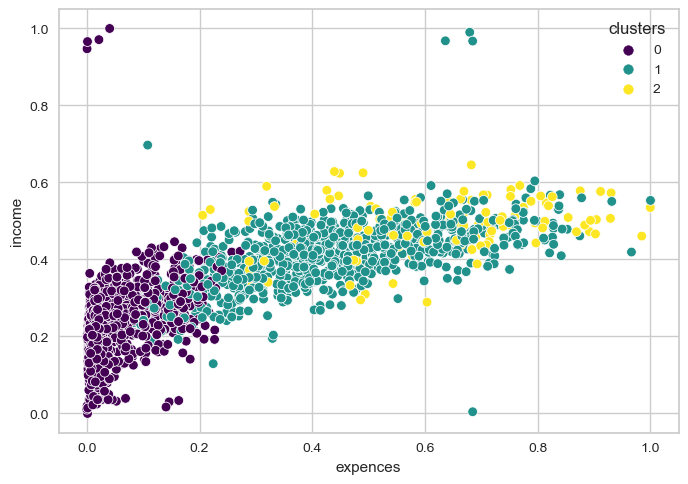

In [474]:
sns.scatterplot(data = X_hmodel, x="expences", y="income", hue="clusters", palette = 'viridis');

## Final Model

In [475]:
pca = PCA(n_components=3)
pca2 = pca.fit_transform(X2)  # PCA dönüşümünü uygulama ve veriyi pca2'ye atama

# PCA sonucu olan pca2'yi kontrol etme
print(pca2.shape)  # pca2'nin boyutlarını kontrol etme

# Hiyerarşik kümeleme modeli oluşturma
HCmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Veri üzerinde modeli eğitme
HCmodel.fit(pca2)

clusters = HCmodel.labels_

df['cluster'] = clusters

df

(2212, 3)


education  income  kidhome  teenhome  recency  mnt_wines  \
0          Graduate   58138        0         0       58        635   
1          Graduate   46344        1         1       38         11   
2          Graduate   71613        0         0       26        426   
3          Graduate   26646        1         0       26         11   
4     Post Graduate   58293        1         0       94        173   
...             ...     ...      ...       ...      ...        ...   
2235       Graduate   61223        0         1       46        709   
2236  Post Graduate   64014        2         1       56        406   
2237       Graduate   56981        0         0       91        908   
2238  Post Graduate   69245        0         1        8        428   
2239  Post Graduate   52869        1         1       40         84   

      mnt_fruits  mnt_meat_products  mnt_fish_products  mnt_sweet_products  \
0             88                546                172                  88   
1              1                  6                  2                   1   
2             49                127                111                  21   
3              4                 20                 10                   3   
4             43                118                 46                  27   
...          ...                ...                ...                 ...   
2235          43                182                 42                 118   
2236           0                 30                  0                   0   
2237          48                217                 32                  12   
2238          30                214                 80                  30   
2239           3                 61                  2                   1   

      ...  complain  dt_days  age  total_children  marital_status_summary  \
0     ...         0      663   57               0                  single   
1     ...         0      113   60               2                  single   
2     ...         0      312   49               0                together   
3     ...         0      139   30               1                together   
4     ...         0      161   33               1                together   
...   ...       ...      ...  ...             ...                     ...   
2235  ...         0      381   47               1                together   
2236  ...         0       19   68               3                together   
2237  ...         0      155   33               0                  single   
2238  ...         0      156   58               1                together   
2239  ...         0      622   60               2                together   

      family_size  expences  purchase_type  total_cmp  cluster  
0               1      1617             25          0        0  
1               3        27              6          0        0  
2               2       776             21          0        0  
3               3        53              8          0        1  
4               3       422             19          0        0  
...           ...       ...            ...        ...      ...  
2235            3      1341             18          0        0  
2236            5       444             22          1        0  
2237            1      1241             19          1        0  
2238            3       843             23          0        0  
2239            4       172             11          0        0  

[2212 rows x 31 columns]

In [476]:
df['cluster'].value_counts()

cluster
0    949
1    852
2    411
Name: count, dtype: int64

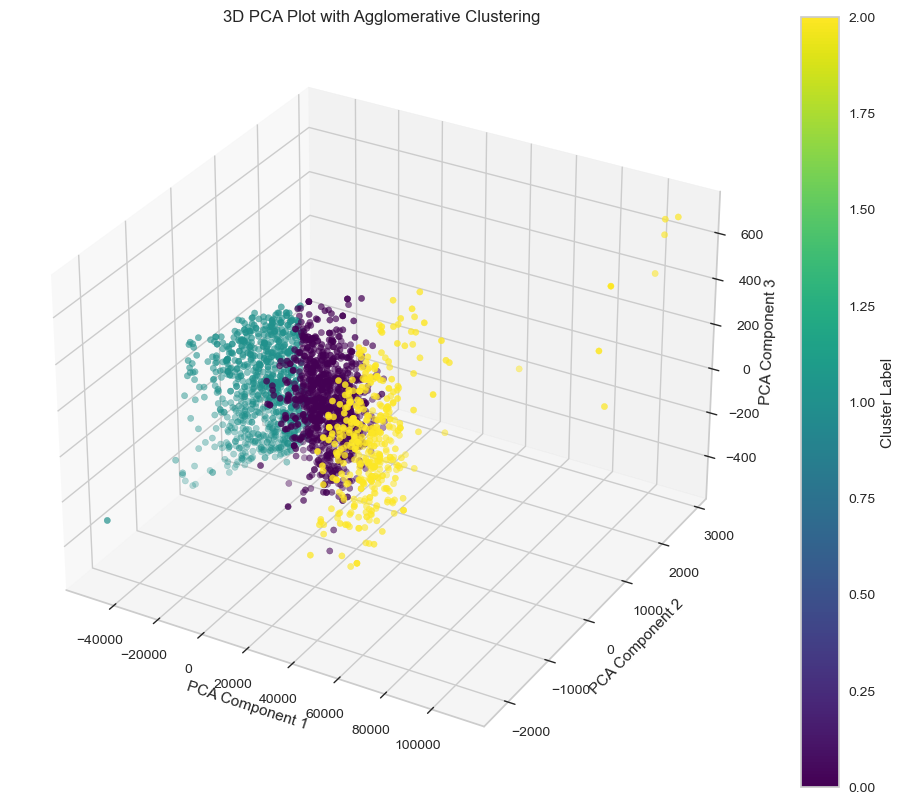

In [477]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Veriyi küme etiketine göre renklendirme
scatter = ax.scatter(pca2[:, 0], pca2[:, 1], pca2[:, 2], c=HCmodel.labels_, cmap='viridis')

# Eksen isimlerini ekleme
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Renk çubuğunu ekleme
plt.colorbar(scatter, ax=ax, label='Cluster Label')

plt.title('3D PCA Plot with Agglomerative Clustering')
plt.show()

In [478]:
clusters = range(3)  # 0, 1, 2

cluster_means = []

# Her küme için ortalama 'income' ve 'expences' değerlerini hesapla
for cluster in clusters:
    cluster_data = df[df['cluster'] == cluster][['income', 'expences']].mean()
    cluster_means.append({
        'cluster': cluster,
        'income_mean': cluster_data['income'],
        'expences_mean': cluster_data['expences']
    })

cluster_means_df = pd.DataFrame(cluster_means)

cluster_means_df

cluster  income_mean  expences_mean
0        0    58,308.06         703.20
1        1    30,120.74         111.05
2        2    82,568.56       1,414.42

In [479]:
df['cluster'].value_counts()

clusters_mapping = {0: 'silver',
                   1 : 'bronze',
                   2 : 'gold',
                   }

df.cluster = df.cluster.map(clusters_mapping)

In [480]:
df.columns

Index(['education', 'income', 'kidhome', 'teenhome', 'recency', 'mnt_wines',
       'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products',
       'mnt_sweet_products', 'mnt_gold_prods', 'num_deals_purchases',
       'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
       'num_web_visits_month', 'accepted_cmp_3', 'accepted_cmp_4',
       'accepted_cmp_5', 'accepted_cmp_1', 'accepted_cmp_2', 'complain',
       'dt_days', 'age', 'total_children', 'marital_status_summary',
       'family_size', 'expences', 'purchase_type', 'total_cmp', 'cluster'],
      dtype='object')

### Clustering by Education

In [481]:
# Violin plot oluşturma
fig = px.violin(df, x="education", y="income", color="cluster",
                title="Income Distribution by Education Level and Cluster",
                labels={"education": "Education Level", "income": "Income", "cluster": "Cluster"})

fig.show()

**While high income is not observed in customer clusters receiving basic education, a significant separation is observed according to income in gold and silver customer clusters receiving higher education.**


In [482]:
# Violin plot oluşturma
fig = px.violin(df, x="education", y="expences", color="cluster",
                title="Income Distribution by Education Level and Cluster",
                labels={"education": "Education Level", "expences": "expences", "cluster": "Cluster"})

fig.show()

In [483]:
df_grouped = df.groupby(['education', 'cluster'])['total_cmp'].mean().reset_index()

# Bar plot oluşturma
fig = px.bar(df_grouped, x='education', y='total_cmp', color='cluster', barmode='group',
             title="Average Total Campaign by total_cmp  and Cluster",
             labels={"education": "Education Level", "total_cmp": "Toatl Campaign", "cluster": "Cluster"})

fig.show()

In [484]:
df_grouped = df.groupby(['education', 'cluster'])['total_children'].mean().reset_index()

# Bar plot oluşturma
fig = px.bar(df_grouped, x='education', y='total_children', color='cluster', barmode='group',
             title="Average Total Children by Education Level and Cluster",
             labels={"education": "Education Level", "total_children": "Average Total Children", "cluster": "Cluster"})

fig.show()

**We see that gold and silver customers have similar trends in terms of the number of children.**


### Clustering by marital_status_summary

In [485]:
# Violin plot oluşturma
fig = px.violin(df, x="marital_status_summary", y="income", color="cluster",
                title="Income Distribution by marital_status_summary and Cluster",
                labels={"marital_status_summary": "marital_status_summary", "income": "Income", "cluster": "Cluster"})

fig.show()

In [486]:
df_grouped = df.groupby(['marital_status_summary', 'cluster'])['expences'].mean().reset_index()

# Bar plot oluşturma
fig = px.bar(df_grouped, x='marital_status_summary', y='expences', color='cluster', barmode='group',
             title="Average expences by marital_status_summary and Cluster",
             labels={"marital_status_summary": "Marital Status", "expences": "Average expences", "cluster": "Cluster"})

fig.show()

**There is no significant difference in marital status among customers in terms of expenditure.**


In [487]:
df_grouped = df.groupby(['marital_status_summary', 'cluster'])['total_cmp'].mean().reset_index()

# Bar plot oluşturma
fig = px.bar(df_grouped, x='marital_status_summary', y='total_cmp', color='cluster', barmode='group',
             title="Average Total Campaign by total_cmp  and Cluster",
             labels={"marital_status_summary": "Marital Status", "total_cmp": "Totall Campaign", "cluster": "Cluster"})

fig.show()

**Although it is not much different for silver customers, we can see that married or cohabiting couples participate in more campaigns than gold and bronze customers.**

### Clustering by selected features

In [488]:
df['Selected_Campaign'] = df[['accepted_cmp_1', 'accepted_cmp_2', 'accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5']].idxmax(axis=1)

In [489]:
df['Selected_Campaign'].value_counts()

Selected_Campaign
accepted_cmp_1    1896
accepted_cmp_3     135
accepted_cmp_4     107
accepted_cmp_5      57
accepted_cmp_2      17
Name: count, dtype: int64

In [490]:
df_grouped = df.groupby(['Selected_Campaign', 'cluster'])['income'].count().reset_index()

# Bar plot oluşturma
fig = px.bar(df_grouped, x='Selected_Campaign', y='income', color='cluster', barmode='group',
             title="Average income by Selected_Campaign  and Cluster",
             labels={"Selected_Campaign": "Selected_Campaign", "income": "Income", "cluster": "Cluster"})

fig.show()

**Bronze customers did not participate in the 2nd and 5th campaigns, while gold and silver customers participated in all campaigns. Among the campaigns, the most popular ones were the 1st and 3rd campaigns.**

In [491]:
df['purchases'] = df[['num_web_purchases', 'num_catalog_purchases', 'num_store_purchases', 'num_deals_purchases']].idxmax(axis=1)

In [492]:
df_grouped = df.groupby(['purchases', 'cluster'])['expences'].count().reset_index()

# Bar plot oluşturma
fig = px.bar(df_grouped, x='purchases', y='expences', color='cluster', barmode='group',
             title="Average income by purchases  and Cluster",
             labels={"purchases": "purchases", "expences": "expences", "cluster": "Cluster"})

fig.show()

**Bronze and silver customers tend to shop mostly in stores, and silver customers still seem to be at the forefront in online shopping.**

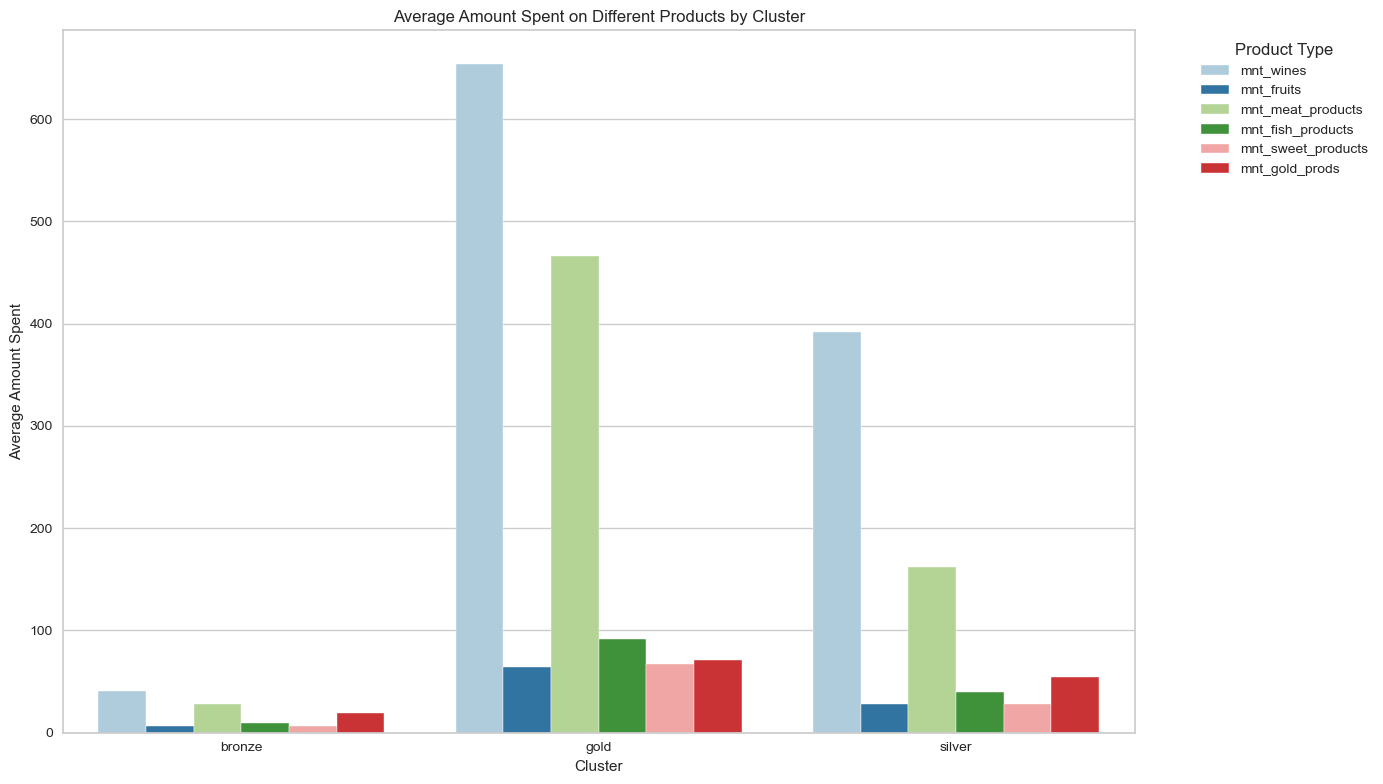

In [493]:
grouped_df = df.groupby('cluster')[['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods']].mean().reset_index()

# Veriyi uzun formata dönüştürme
melted_df = grouped_df.melt(id_vars='cluster', var_name='Product_Type', value_name='Average_Spent')

# Görselleştirme
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_df, x='cluster', y='Average_Spent', hue='Product_Type', palette='Paired')

plt.title('Average Amount Spent on Different Products by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Amount Spent')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Gold customers have the largest share in all product purchases. When we look at the range of products purchased, it is clearly observed that wine and meat products have the highest sales figures, respectively.**

<Figure size 800x550 with 0 Axes>

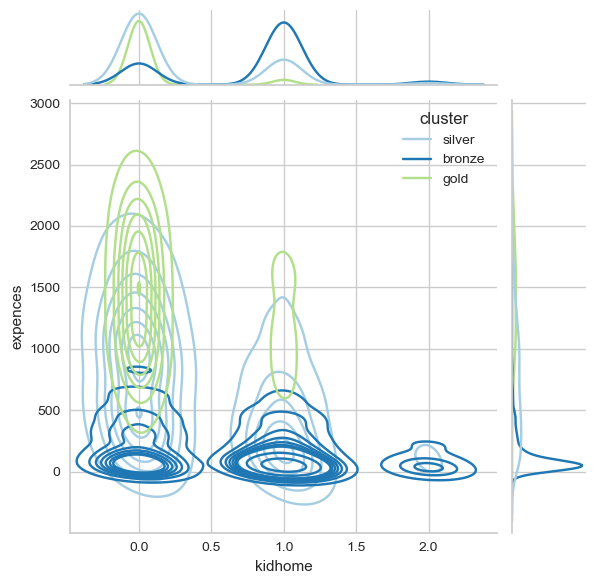

<Figure size 800x550 with 0 Axes>

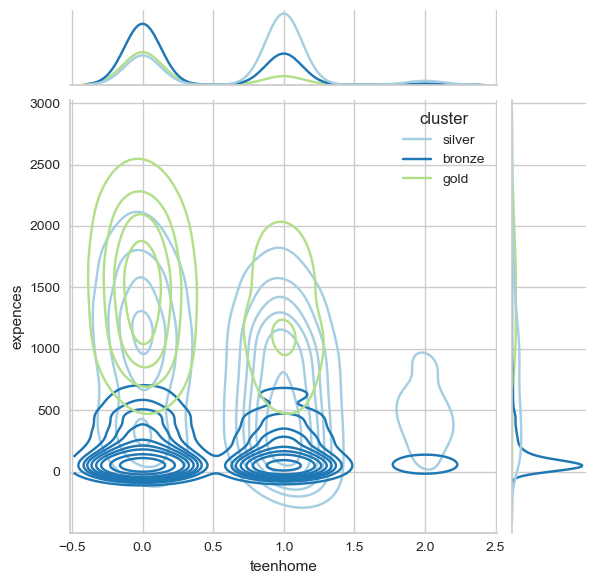

<Figure size 800x550 with 0 Axes>

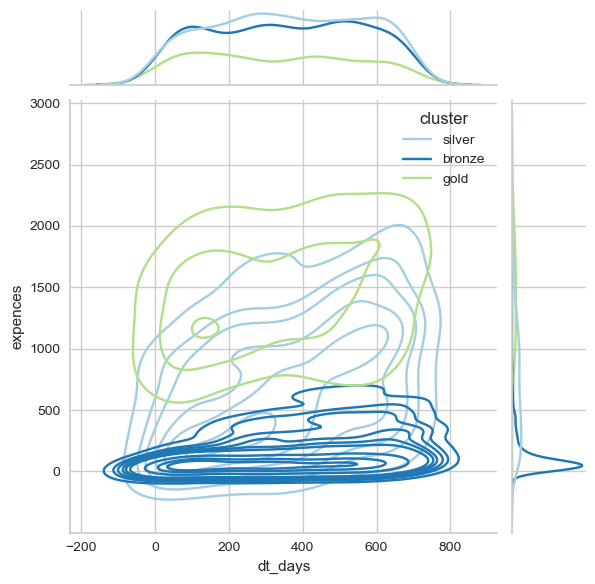

<Figure size 800x550 with 0 Axes>

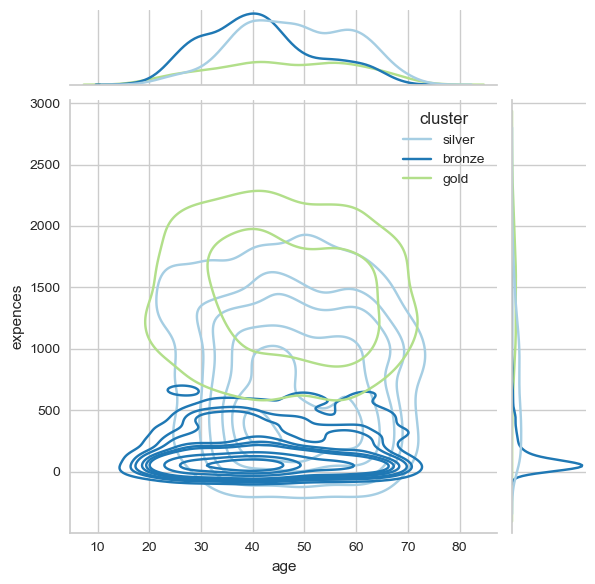

<Figure size 800x550 with 0 Axes>

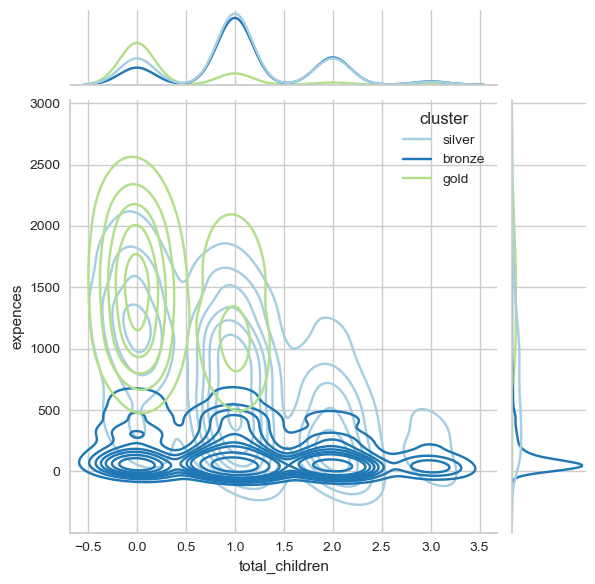

<Figure size 800x550 with 0 Axes>

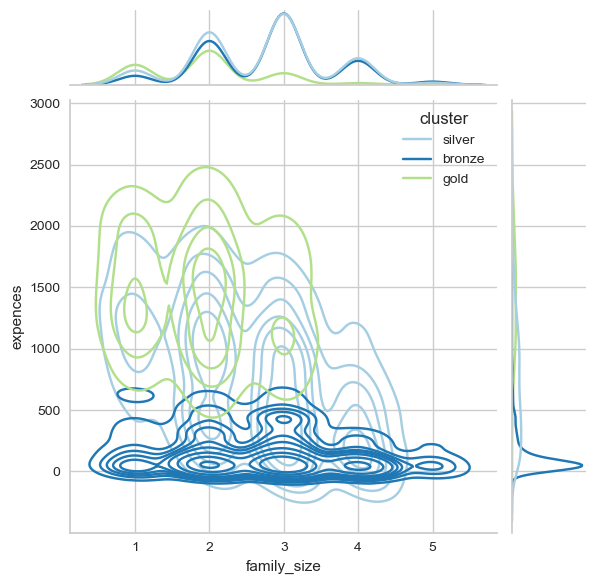

<Figure size 800x550 with 0 Axes>

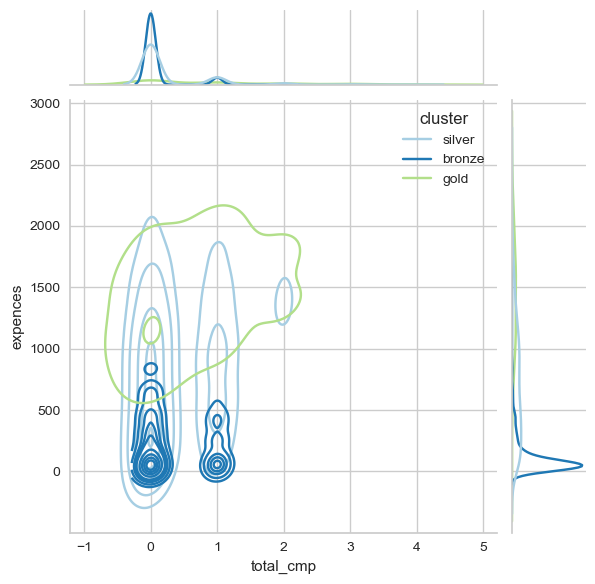

<Figure size 800x550 with 0 Axes>

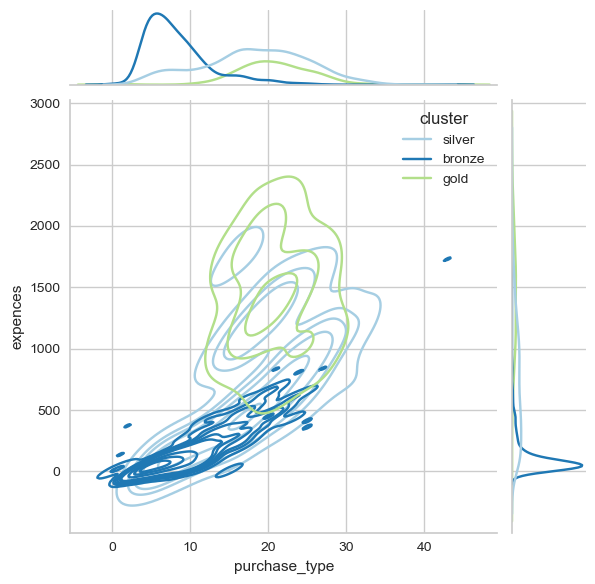

In [494]:
pal = sns.color_palette("Paired", len(df["cluster"].unique())) 

Personal = [ "kidhome","teenhome","dt_days", "age", "total_children", "family_size", 'total_cmp', 'purchase_type']

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["expences"], hue =df["cluster"], kind="kde", palette=pal)
    plt.show()

## Conclusion

**In this project, Kmeans and hierarchical models were studied with the 'marketing_campaign' dataset, and since it was observed that the clusters were more clearly separated compared to the hierarchical model, the study was completed and analyzes were carried out by continuing with the hierarchical model. As a result, the insights regarding customer segmentation that emerged from the analysis we obtained are as follows:**

**Gold Customers:** 

- Has high income and high expenses

- Highly educated

- The number of children and family size is very low

- Has at most one child and the number of teenhomes is higher

- It tends to be younger than the gold and silver clusters

- Has the highest campaign participation

 
**Silver Customers:** 

- Have an above average income and high expenses

- Highly educated

- At least one child

- More teenhomes

- Families of 3 people are mostly

- Middle age

- It has the highest campaign participation after the diamond cluster:** 

**Bronze Customers:**

- Have low income and low spending,

- They have basic education levels and very few have higher education levels.

- Has the highest number of children

- More kidhomes

- Have a larger family

- The youngest

- Participation rates in the campaign are quite low



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___